# Importing necessary libraries


In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Loading Data Provided

In [2]:
train=pd.read_csv("dengue_features_train.csv")

In [3]:
train.head(5)


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [4]:
train.shape

(1456, 24)

In [5]:
test=pd.read_csv("dengue_features_test.csv")

In [6]:
test.head(5)

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.091200                 78.60             298.492857  ...   
1  0.072314                 12.56             298.475714  ...   
2  0.091529                  3.66             299.455714  ...   
3  0.125686                  0.00             299.690000  ...   
4  0.075914                  0.76             299.780000  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1  

[5 rows x 24 columns]

In [7]:

test.shape

(416, 24)

In [8]:
#labels

labels=pd.read_csv("dengue_labels_train.csv")

In [9]:
labels.head(5)


city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [10]:

labels.shape

(1456, 4)

In [11]:
#merging data
merged_data_train = train.merge(labels, on=["city", "year", "weekofyear"], how="right")
merged_data_train_shape = merged_data.shape
print("Shape of merged data:", merged_data_train_shape)


NameError: name 'merged_data' is not defined

In [ ]:
merged_data_train.head(15)

In [12]:
#Description of Dataset
#train
print(merged_data_train.describe())
#test set
print(test.describe())

              year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714  

In [13]:
#summary of the combined set
print(merged_data_train.info())

#test data info
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

**1456 observations, 25 columns, 2 objects, 3 integer values, and 20 float columns make up the combined dataset.**

In [14]:
#Checking on target variable
merged_data_train.total_cases.value_counts()

0      100
6       71
5       70
3       70
2       69
      ... 
288      1
221      1
149      1
154      1
58       1
Name: total_cases, Length: 135, dtype: int64

In [15]:
#Changing week start date to date time.
merged_data_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [16]:
print("There are ",len(merged_data_train.columns)," columns in the merged data")

There are  25  columns in the merged data


In [17]:
#train test
merged_data_train['week_start_date']=pd.to_datetime(merged_data_train['week_start_date'],
                                             format='%Y/%m/%d')

#test set
test['week_start_date']=pd.to_datetime(test['week_start_date'],
                                             format='%Y/%m/%d')

In [18]:
# create new datasets by Separating entries based on cities
#train
sj = merged_data_train[merged_data_train['city'] == 'sj']
iq = merged_data_train[merged_data_train['city'] == 'iq']

#tests

sj_test = test[test['city'] == 'sj']
iq_test = test[test['city'] == 'iq']

In [19]:
sj.shape

(936, 25)

In [20]:
sj.shape

(936, 25)

In [21]:
sj_test.shape

(260, 24)

In [22]:
iq_test.shape

(156, 24)

In [23]:
#Print the count of missing values in San Juan data
print(sj.isnull().sum())

#Print the count of missing values in San Juan test data
print(sj.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [24]:
#Geting the percentage of missing data

print(sj.isnull().sum()/len(sj)*100)

#test
sj_test.isnull().sum()/len(sj)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  20.405983
ndvi_nw                                   5.235043
ndvi_se                                   2.029915
ndvi_sw                                   2.029915
precipitation_amt_mm                      0.961538
reanalysis_air_temp_k                     0.641026
reanalysis_avg_temp_k                     0.641026
reanalysis_dew_point_temp_k               0.641026
reanalysis_max_air_temp_k                 0.641026
reanalysis_min_air_temp_k                 0.641026
reanalysis_precip_amt_kg_per_m2           0.641026
reanalysis_relative_humidity_percent      0.641026
reanalysis_sat_precip_amt_mm              0.961538
reanalysis_specific_humidity_g_per_kg     0.641026
reanalysis_tdtr_k                         0.641026
station_avg_temp_c             

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  4.594017
ndvi_nw                                  1.175214
ndvi_se                                  0.106838
ndvi_sw                                  0.106838
precipitation_amt_mm                     0.213675
reanalysis_air_temp_k                    0.213675
reanalysis_avg_temp_k                    0.213675
reanalysis_dew_point_temp_k              0.213675
reanalysis_max_air_temp_k                0.213675
reanalysis_min_air_temp_k                0.213675
reanalysis_precip_amt_kg_per_m2          0.213675
reanalysis_relative_humidity_percent     0.213675
reanalysis_sat_precip_amt_mm             0.213675
reanalysis_specific_humidity_g_per_kg    0.213675
reanalysis_tdtr_k                        0.213675
station_avg_temp_c                       0.213675


**No columns will be dropped since the percentage of missing data is within the acceptable threshold**

Data Description

In [25]:
#train
print(sj.describe())
print(iq.describe())

              year  weekofyear     ndvi_ne     ndvi_nw     ndvi_se  \
count   936.000000  936.000000  745.000000  887.000000  917.000000   
mean   1998.826923   26.503205    0.057925    0.067469    0.177655   
std       5.212076   15.021909    0.107153    0.092479    0.057166   
min    1990.000000    1.000000   -0.406250   -0.456100   -0.015533   
25%    1994.000000   13.750000    0.004500    0.016425    0.139283   
50%    1999.000000   26.500000    0.057700    0.068075    0.177186   
75%    2003.000000   39.250000    0.111100    0.115200    0.212557   
max    2008.000000   53.000000    0.493400    0.437100    0.393129   

          ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  917.000000            927.000000             930.000000   
mean     0.165956             35.470809             299.163653   
std      0.056073             44.606137               1.236429   
min     -0.063457              0.000000             295.938571   
25%      0.129157              0.000000

In [26]:
#test
print(sj_test.describe())
print(iq_test.describe())

              year  weekofyear     ndvi_ne     ndvi_nw     ndvi_se  \
count   260.000000  260.000000  217.000000  249.000000  259.000000   
mean   2010.326923   26.503846    0.024801    0.036730    0.177055   
std       1.492855   15.043951    0.133765    0.087036    0.066873   
min    2008.000000    1.000000   -0.463400   -0.211800    0.006200   
25%    2009.000000   13.750000   -0.046900   -0.008200    0.131857   
50%    2010.000000   26.500000    0.014975    0.032140    0.169350   
75%    2012.000000   39.250000    0.079900    0.077600    0.218107   
max    2013.000000   53.000000    0.500400    0.649000    0.385383   

          ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  259.000000            258.000000             258.000000   
mean     0.153226             26.521124             299.458051   
std      0.055127             31.640533               1.282253   
min     -0.014671              0.000000             296.651429   
25%      0.116271              2.122500

**Working on missing data**

In [27]:
#Imputing missing values using forward fill
sj.fillna(method='ffill',inplace=True)
sj.isnull().sum()


#Imputing missing values for test set
sj_test.fillna(method='pad',inplace=True)
sj_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

**Iquitos data**

In [28]:
#train
print(iq.isnull().sum())

#test
print(iq_test.isnull().sum())

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [29]:

#checking on percentages 
#train
print(iq.isnull().sum()/len(iq)*100)

#test
print(iq_test.isnull().sum()/len(iq)*100)

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.576923
ndvi_nw                                  0.576923
ndvi_se                                  0.576923
ndvi_sw                                  0.576923
precipitation_amt_mm                     0.769231
reanalysis_air_temp_k                    0.769231
reanalysis_avg_temp_k                    0.769231
reanalysis_dew_point_temp_k              0.769231
reanalysis_max_air_temp_k                0.769231
reanalysis_min_air_temp_k                0.769231
reanalysis_precip_amt_kg_per_m2          0.769231
reanalysis_relative_humidity_percent     0.769231
reanalysis_sat_precip_amt_mm             0.769231
reanalysis_specific_humidity_g_per_kg    0.769231
reanalysis_tdtr_k                        0.769231
station_avg_temp_c                       7.115385


Based on the output above, it seems that there are no columns in the Iquitos data with missing values exceeding 20% of the total. As a result, we will not be dropping any columns in this case.

Filling missing values in Iquitos data.

In [30]:
#Imputed for missing values using forward fill method.
#train
iq.fillna(method='pad', inplace=True)
print(iq.isnull().sum())

#test
iq_test.fillna(method='pad', inplace=True)
print(iq_test.isnull().sum())

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

Treating Duplicate Values

In [31]:
#duplicated on Iquitos
#train
print(iq.duplicated().sum())
#test
print(iq_test.duplicated().sum())

0
0


In [32]:

#duplicated on san juan
#train
print(sj.duplicated().sum())

#test
print(sj_test.duplicated().sum())

0
0


**Since there are no duplicate values, we donot need to perform any method**

Outliers in the data

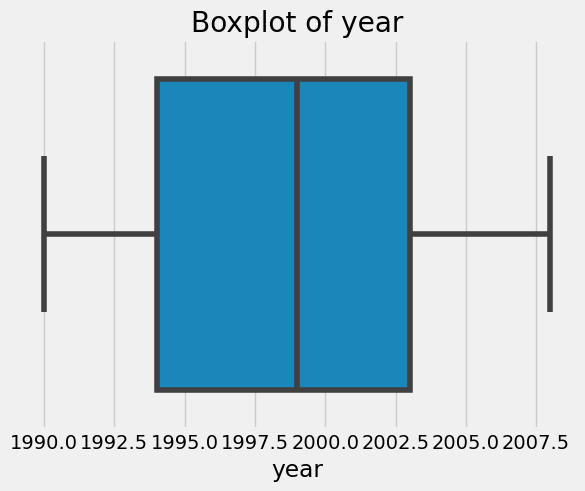

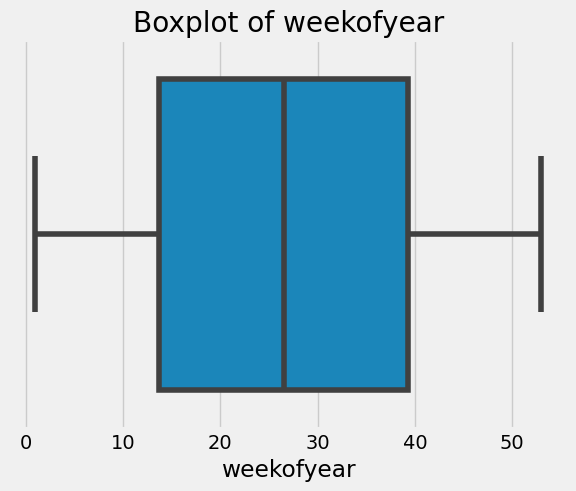

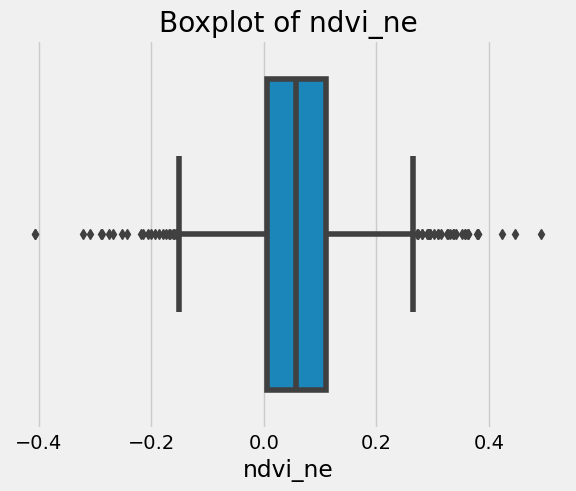

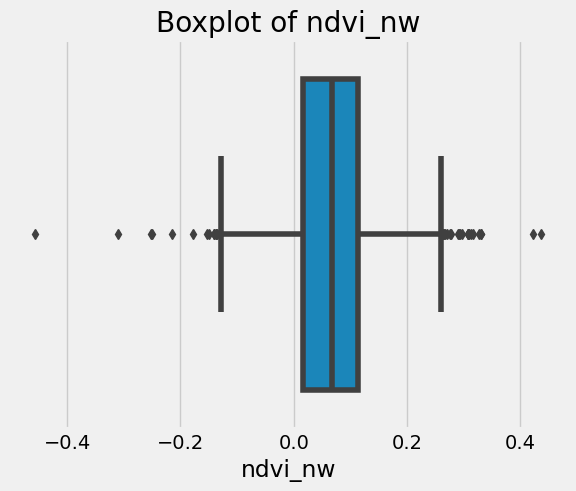

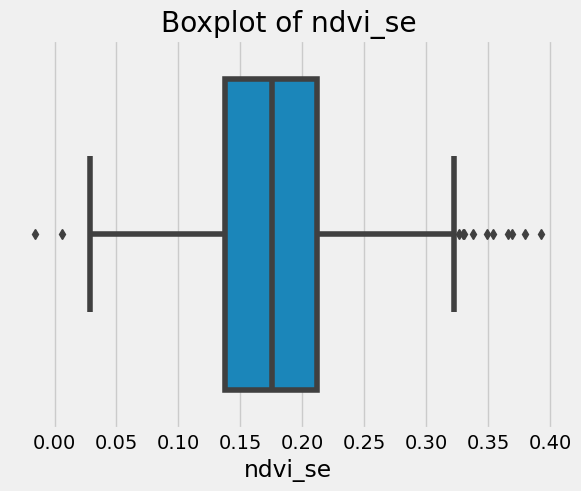

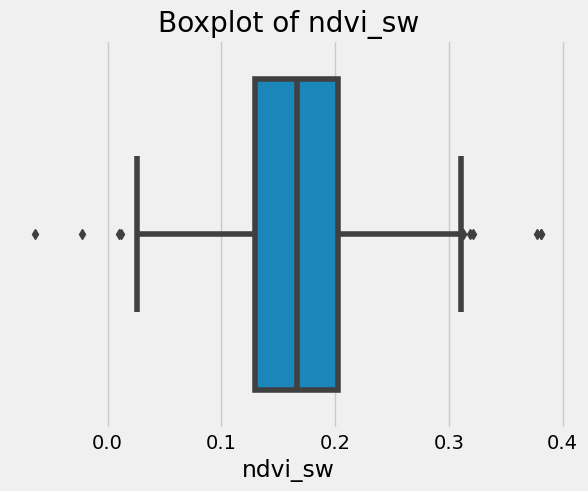

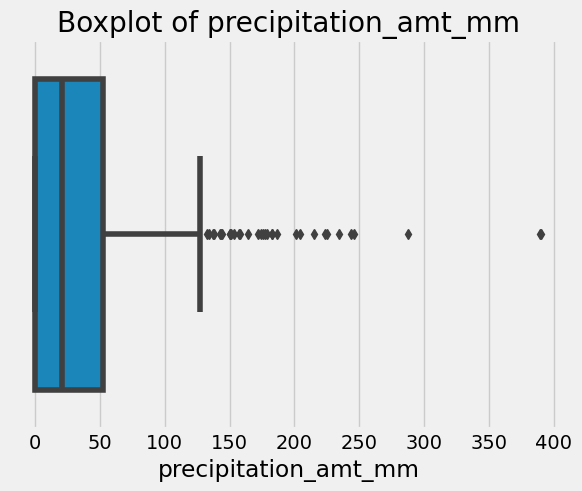

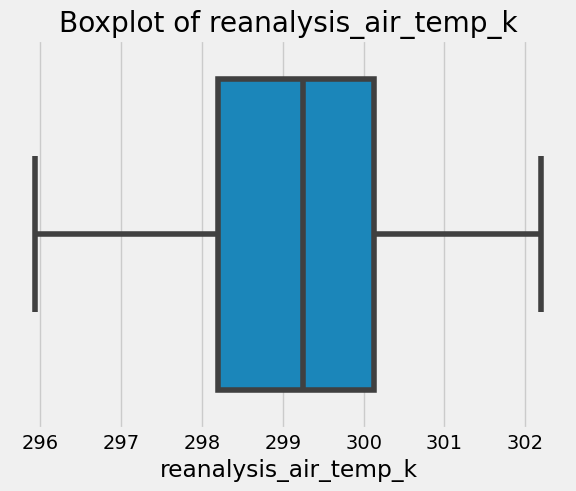

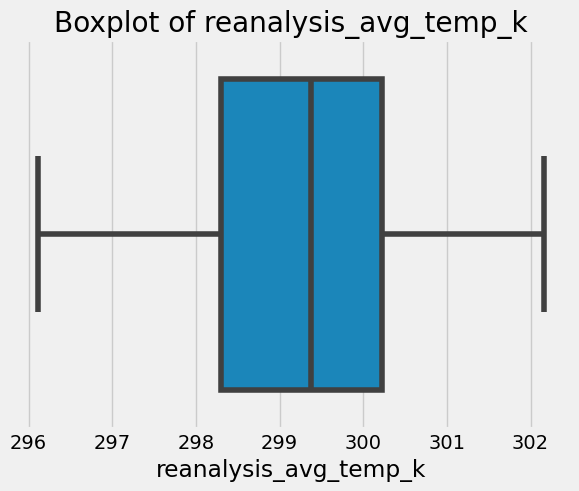

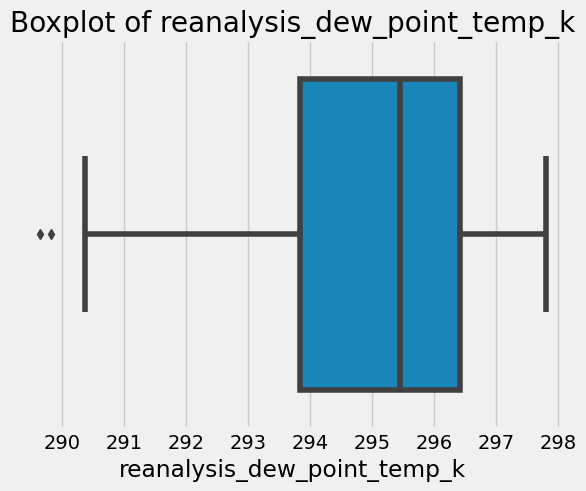

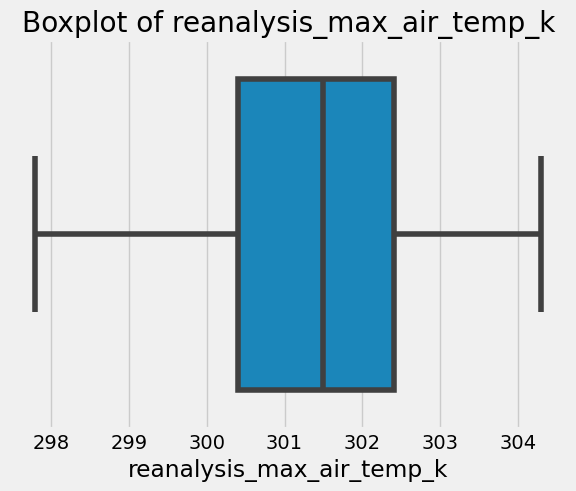

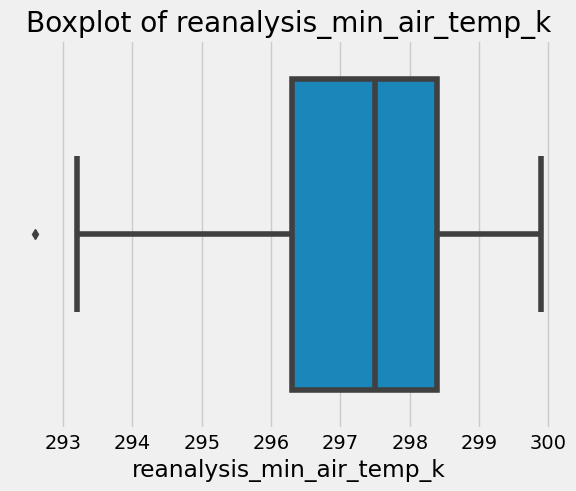

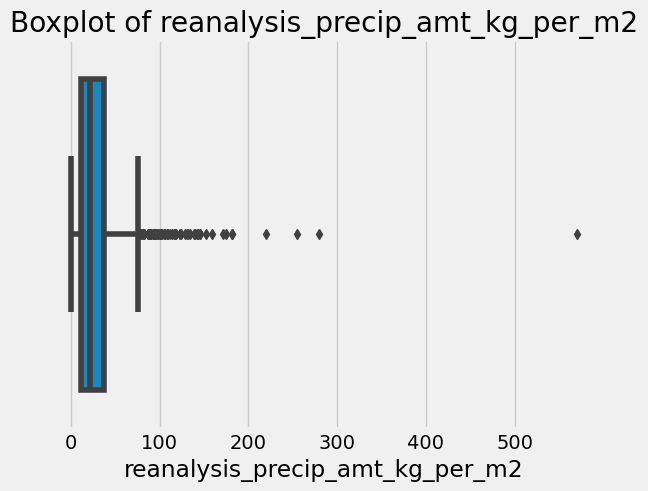

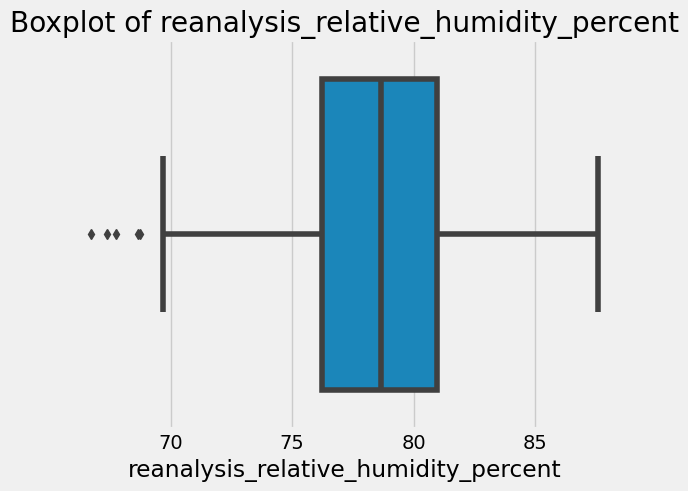

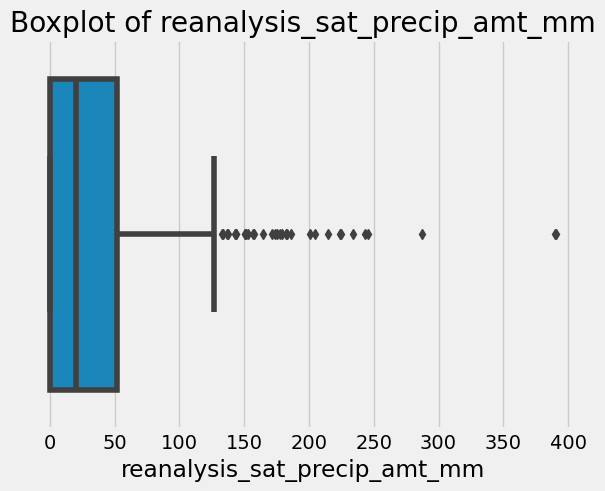

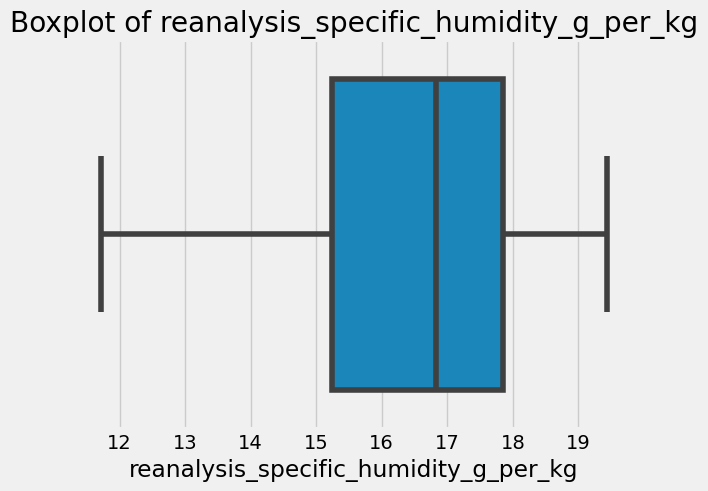

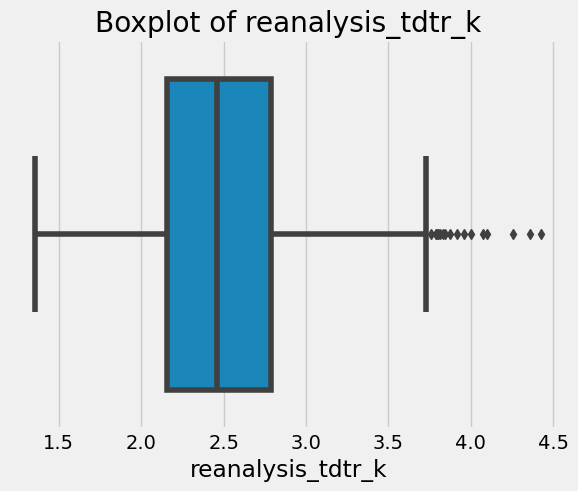

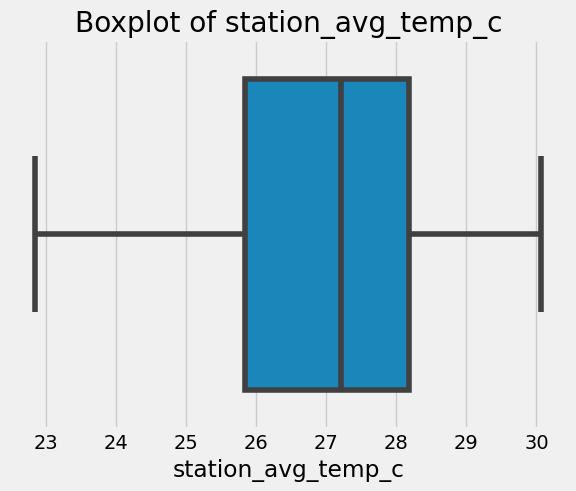

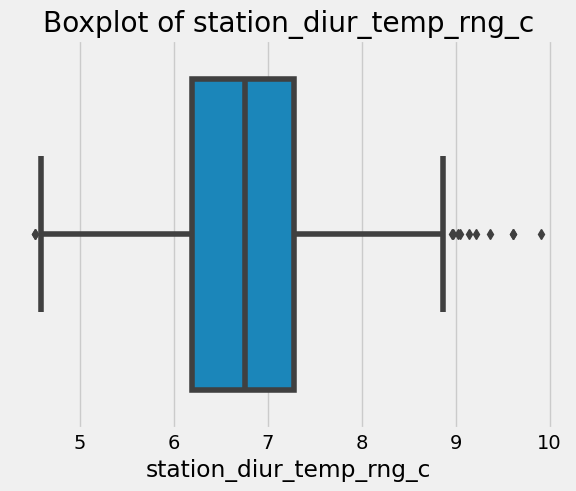

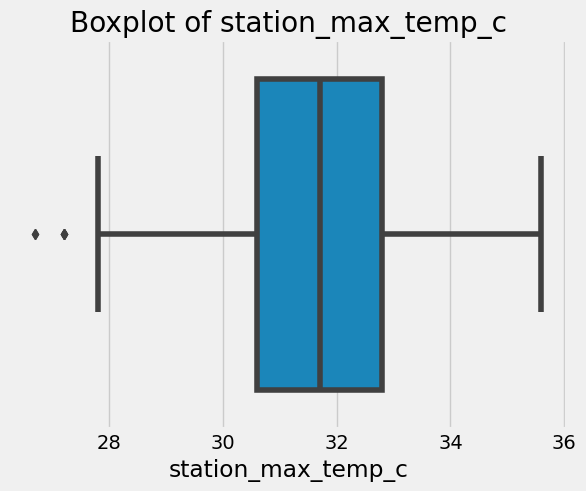

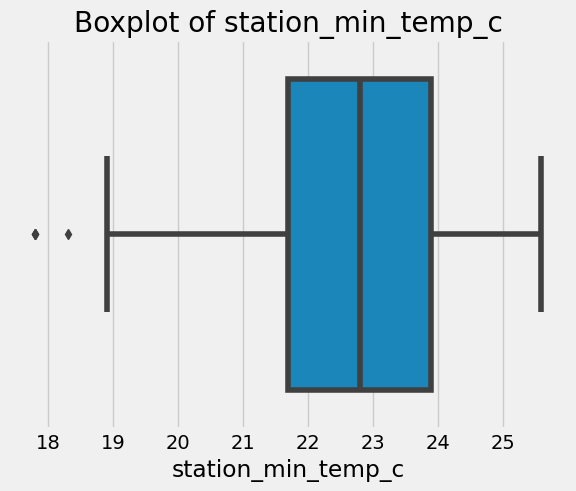

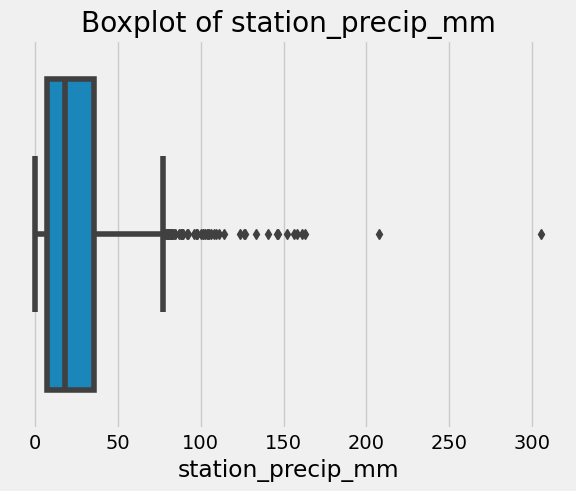

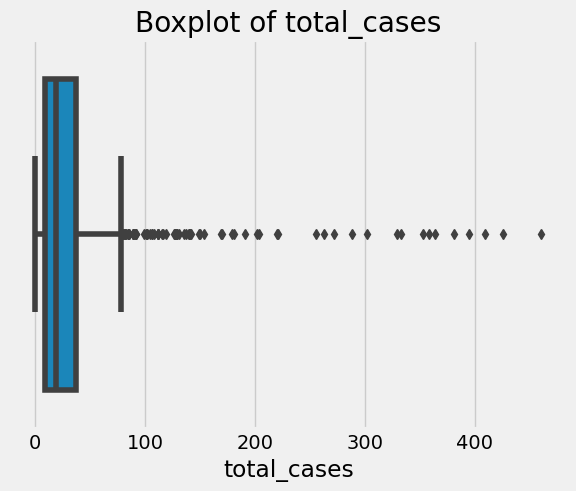

In [33]:
#Numeric features
sj_numeric = sj.drop(['city','week_start_date'],axis=1)

for column in sj_numeric.columns:
    sns.boxplot(x=sj_numeric[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


Outliers are still visible in NDVI columns because they indicate regions with extraordinary vegetation cover. Deserts with sand or rock as well as regions covered in snow correlate to NDVI values of 0 and below. Shrubs and grasses are represented by values between 0 and 0.3, whereas temperate and tropical rainforests are represented by values between 0.3 and 0.7. Green, thick plant cover is indicated by high NDVI values greater than 0.7.


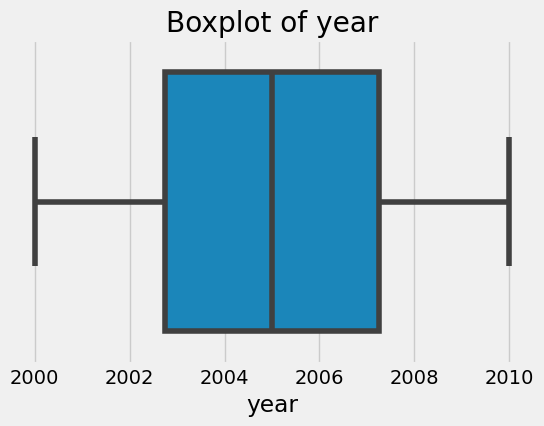

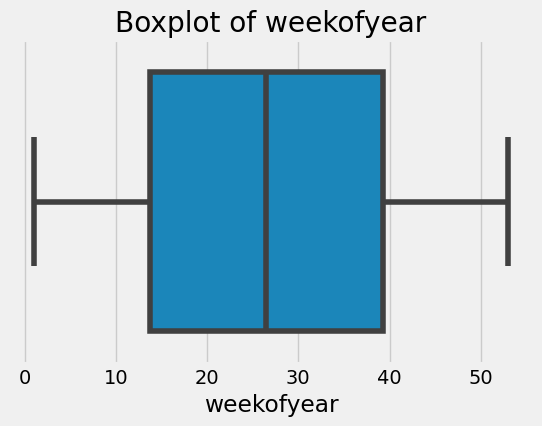

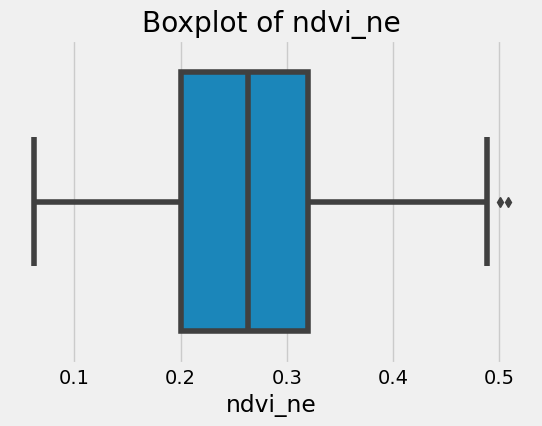

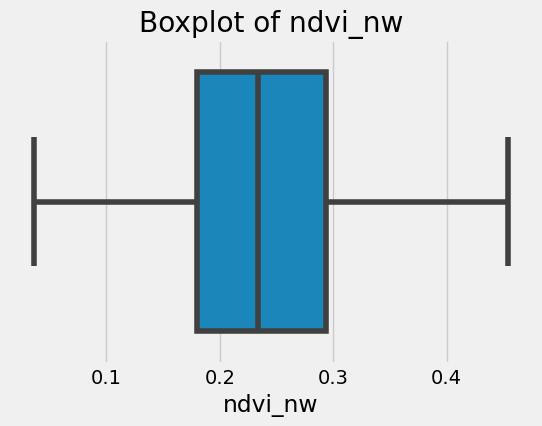

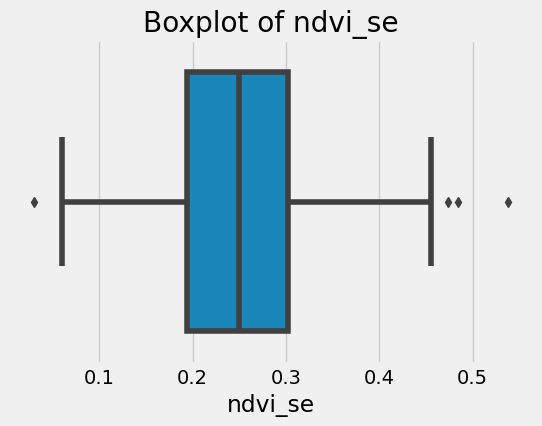

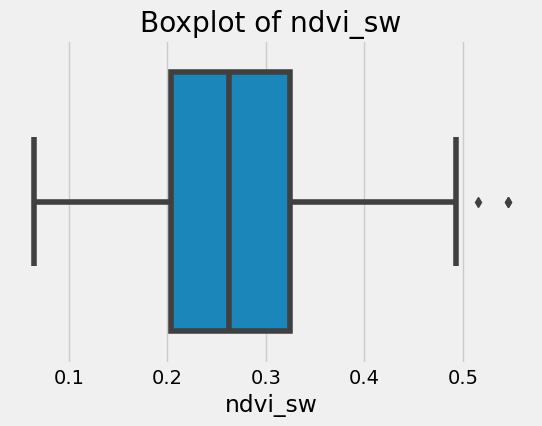

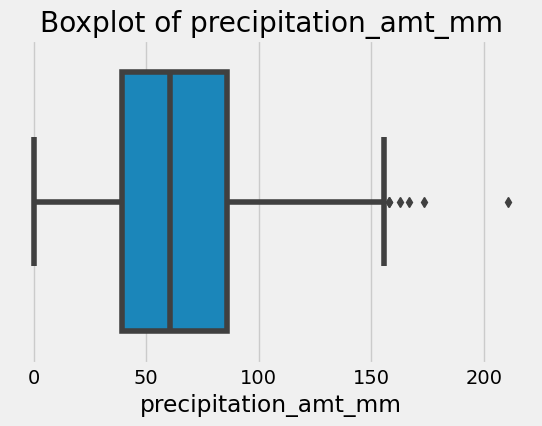

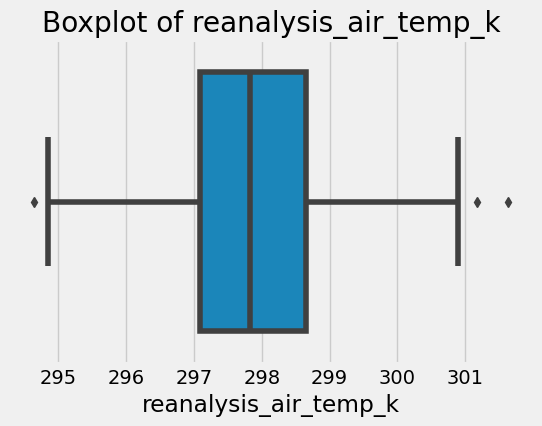

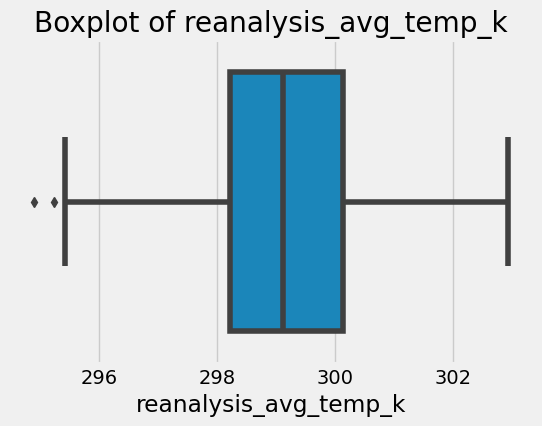

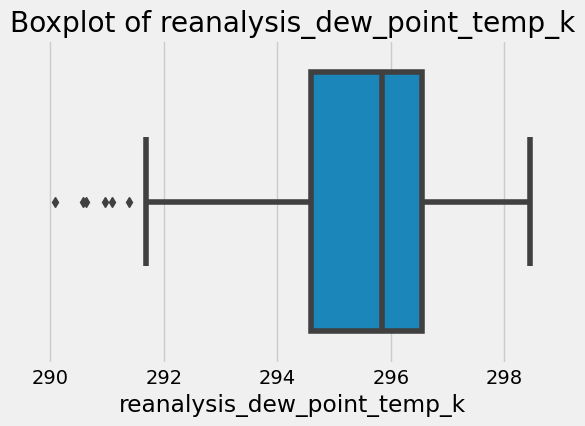

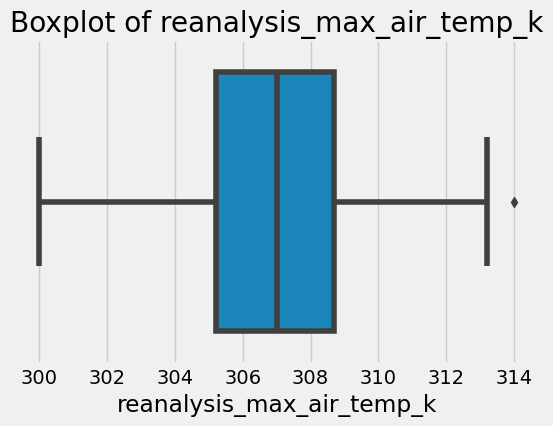

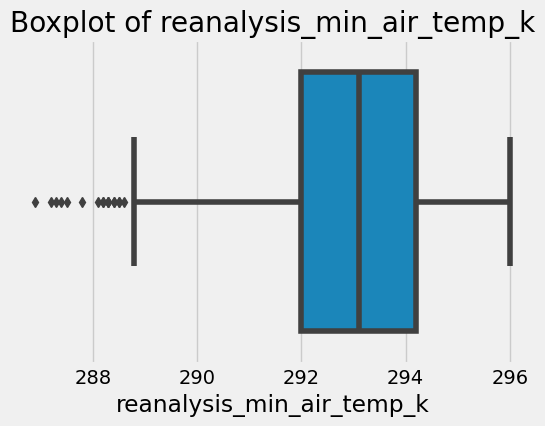

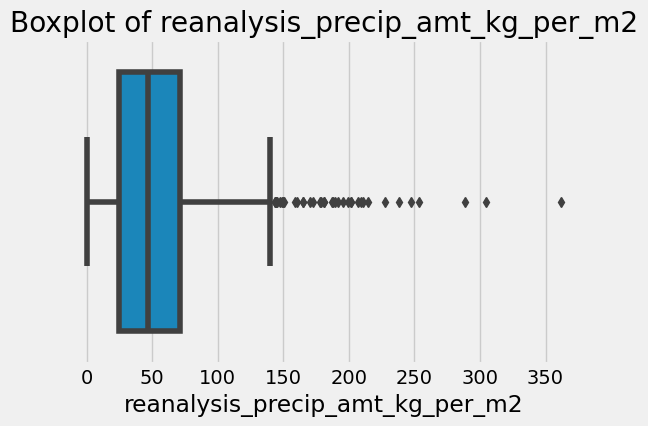

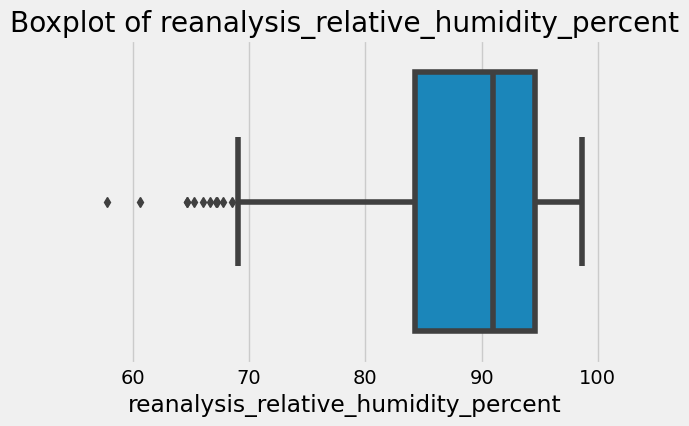

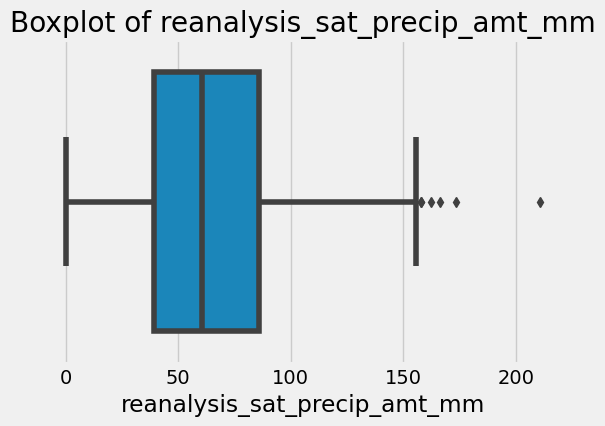

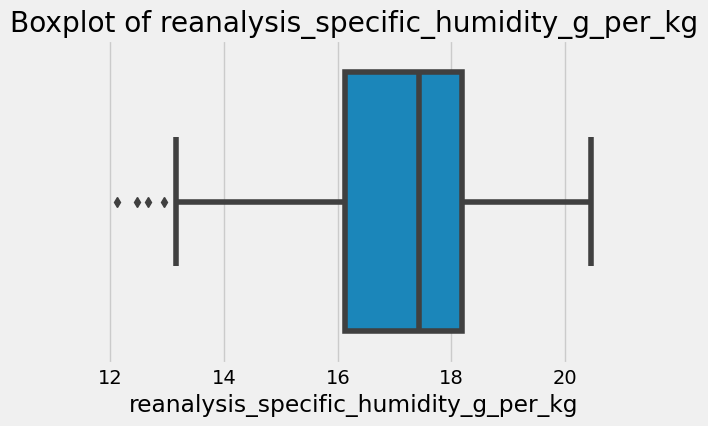

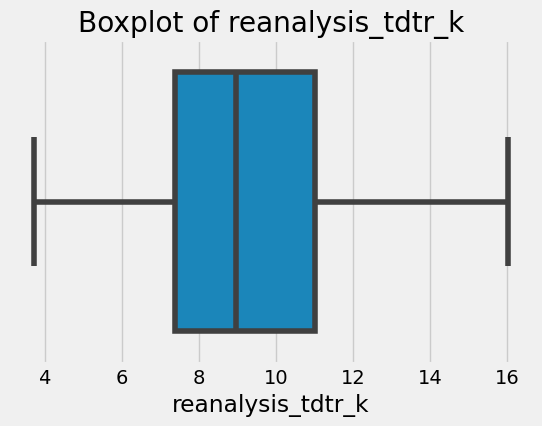

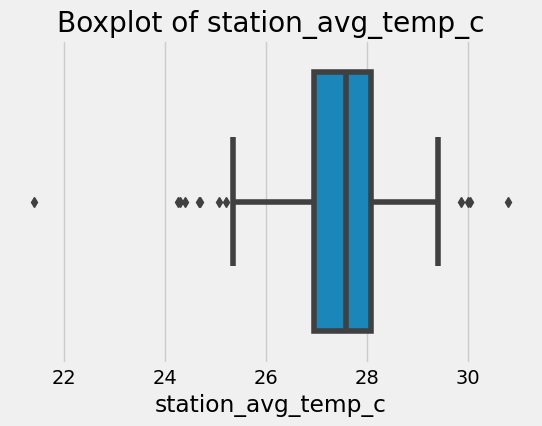

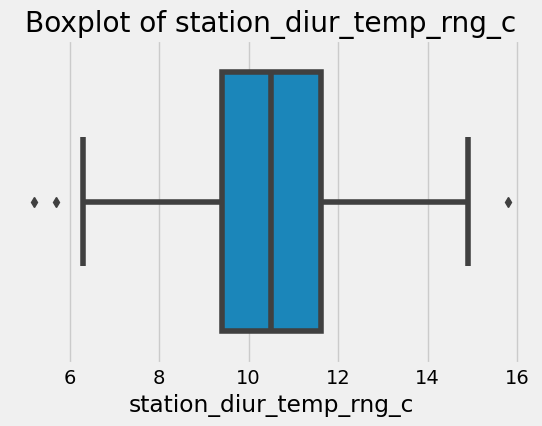

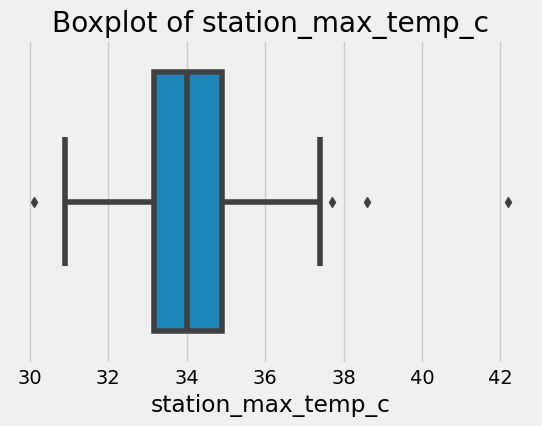

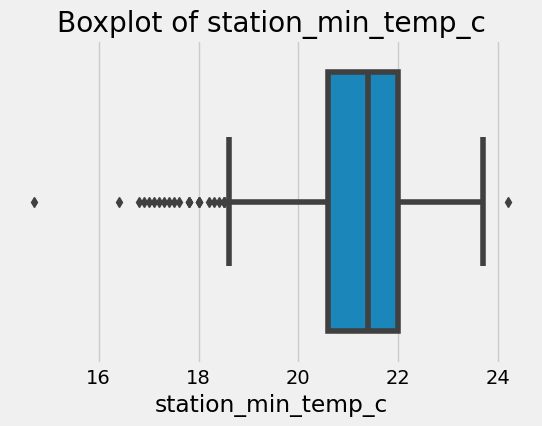

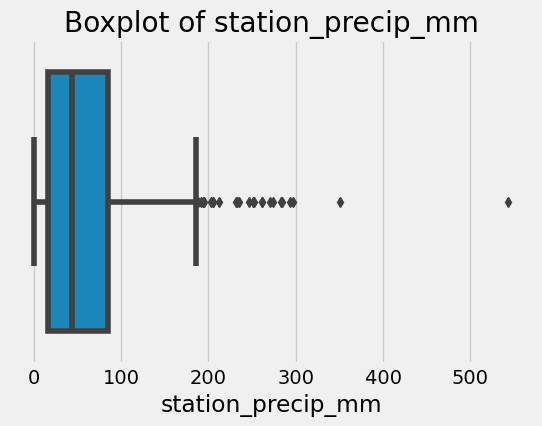

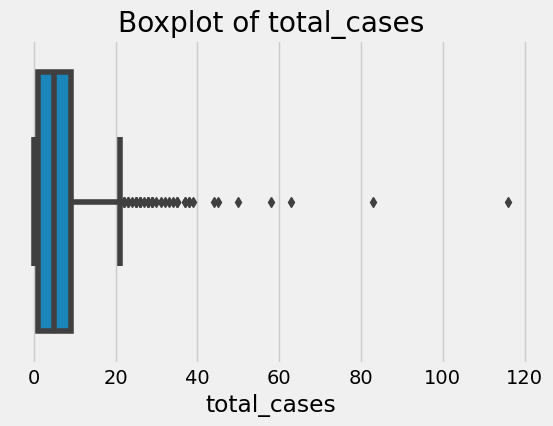

In [34]:
#Numeric features
iq_num = iq.drop(['city','week_start_date'],axis=1)

for col in iq_num.columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=iq_num[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.show()





**EDA**

Exploratory Data Analysis

**Univariate Analysis**

**San Juan**

In [35]:
sj.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [36]:
#Representation of cities in dataset.

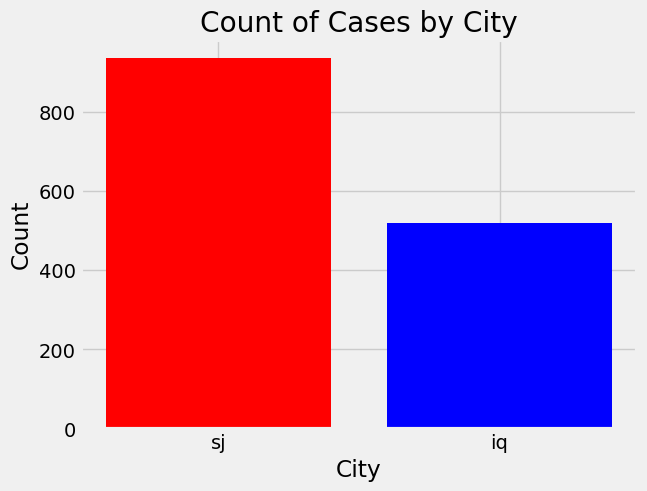

In [37]:
city_count = merged_data_train["city"].value_counts()
plt.bar(city_count.index, city_count.values, color=["red", "blue"])
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Count of Cases by City")
plt.show()

In [38]:
#Distribution of Total cases.

Minimum cases in San Juan: 0
Maximum cases in San Juan: 461


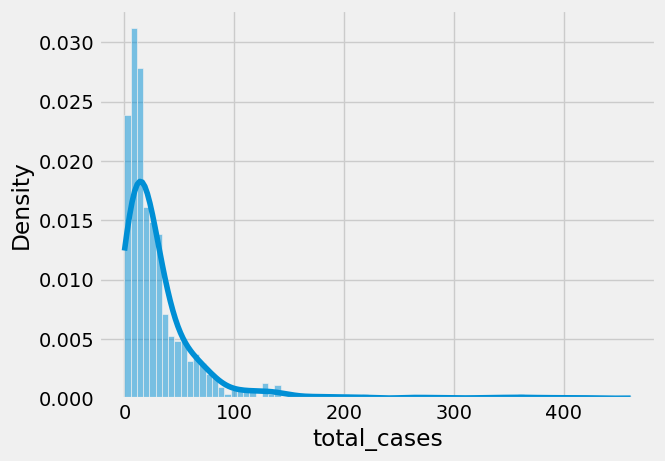

In [39]:
#getting min and max value of total cases
sj_min_cases = sj['total_cases'].min()
sj_max_cases = sj['total_cases'].max()

print(f"Minimum cases in San Juan: {sj_min_cases}")
print(f"Maximum cases in San Juan: {sj_max_cases}")

#Plotting the distribution of total cases
sns.histplot(data=sj, x="total_cases", kde=True, stat="density")
plt.show()

The majority of the entries for total cases fall between 0 to 50, with relatively fewer cases above 100.

In [40]:
#3 NVDI.

In [41]:
#checking min and max values of week start dates
print(sj['weekofyear'].min())
print(sj['weekofyear'].max())

1
53


In [42]:
sj['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53])

In [43]:
sj['ndvi_nw'].min()

-0.4561

An area's plant cover may be determined using the NDVI, a vegetation index. The range of values is from -1 to 1. Values below zero denote water, whereas those over zero denote arid regions made of rock, sand, or snow. While high values correlate to temperate and tropical rainforests, low, positive values denote shrub and grasslands.


<AxesSubplot: >

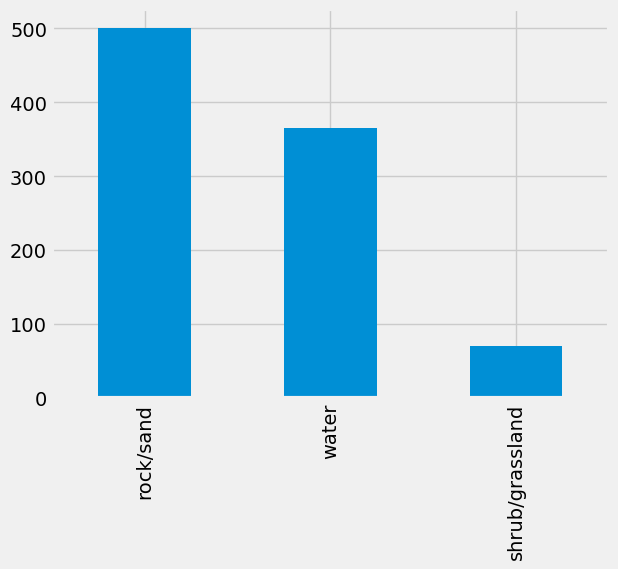

In [45]:
# Vegetation
# getting total vegetation
sj['ndvi_all_directions'] = sj[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)

# define ndvi categories
ndvi_categories = { 
    'water': lambda x: x < 0.1, 
    'rock/sand': lambda x: x >= 0.1 and x < 0.2, 
    'shrub/grassland': lambda x: x >= 0.2 and x < 0.5,
    'forest': lambda x: x >= 0.6
}

# calculate ndvi categories
sj['ndvi_desc'] = sj['ndvi_all_directions'].apply(lambda x: next((k for k, v in ndvi_categories.items() if v(x)), 'other'))

# plot ndvi categories
sj['ndvi_desc'].value_counts().plot(kind='bar')


Most of this city is made up of rocky terrain, while the remaining area is primarily made up of water with a few bushes.Given that San Juan is an island in the Caribbean, this was expected.


**Iquitos**

In [46]:
#datatypes
iq.dtypes


city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [47]:
#1 Total Cases

0
116


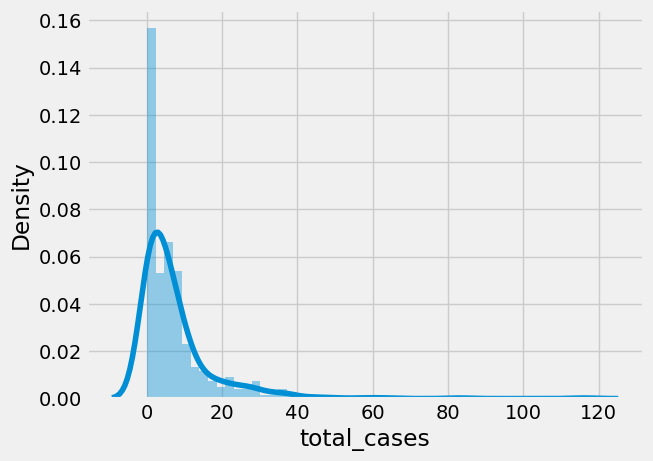

In [48]:
# getting min and max value of total cases
print(iq['total_cases'].min())

# max value of total cases
print(iq['total_cases'].max())

#Plotting the distribution of total cases
sns.distplot(iq.total_cases)
plt.show()


Similar to Iquitos, most entries are below 50 and decrease towards 100; exceeding 100 is uncommon.

In [49]:
#2 Weeks of year.

In [50]:
#checking min and max values of week start dates
print(iq['weekofyear'].min())
print(iq['weekofyear'].max())

1
53


In [51]:
iq['weekofyear'].unique()

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       52, 53])

In [52]:
#3 NDVI

In [53]:
iq['ndvi_ne'].min()

0.06172857

Water is represented by NDVI values that are negative (values close to -1). Values near 0 (-0.1 to 0.1) typically represent arid patches of rock, sand, or snow. Finally, low, positive values (between 0.2 and 0.4) reflect shrub and grassland, whereas high values (values close to 1) represent temperate and tropical rainforests.


<AxesSubplot: >

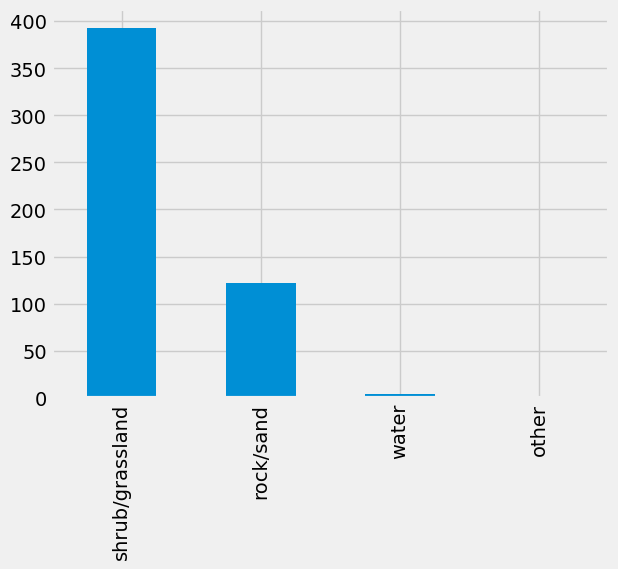

In [54]:
# getting total vegetation
iq['ndvi_all_directions'] = (iq['ndvi_ne'] + iq['ndvi_nw'] + iq['ndvi_se'] + iq['ndvi_sw']) / 4

# categorizing vegetation into different specific types
def get_ndvi_category(x):
    x = float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x < 0.2: return 'rock/sand'
    if x >= 0.2 and x < 0.5: return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return "other"

iq['ndvi_desc'] = iq.ndvi_all_directions.apply(get_ndvi_category)

# calculating frequency of the type of vegetation
iq['ndvi_desc'].value_counts().plot(kind='bar')


In Iquitos, grassland and shrubs predominate. observations In San Juan, the deadliest year was 1994, while in Iquitos, it was 2008. The year with the fewest instances in San Juan was 2008, whereas there were none in Iquitos, Peru, in 2000. Iquitos is largely grassland and shrubland, whereas San Juan is mostly rocky.


**Bivariate Analysis**

In [55]:
#Checking Correlations

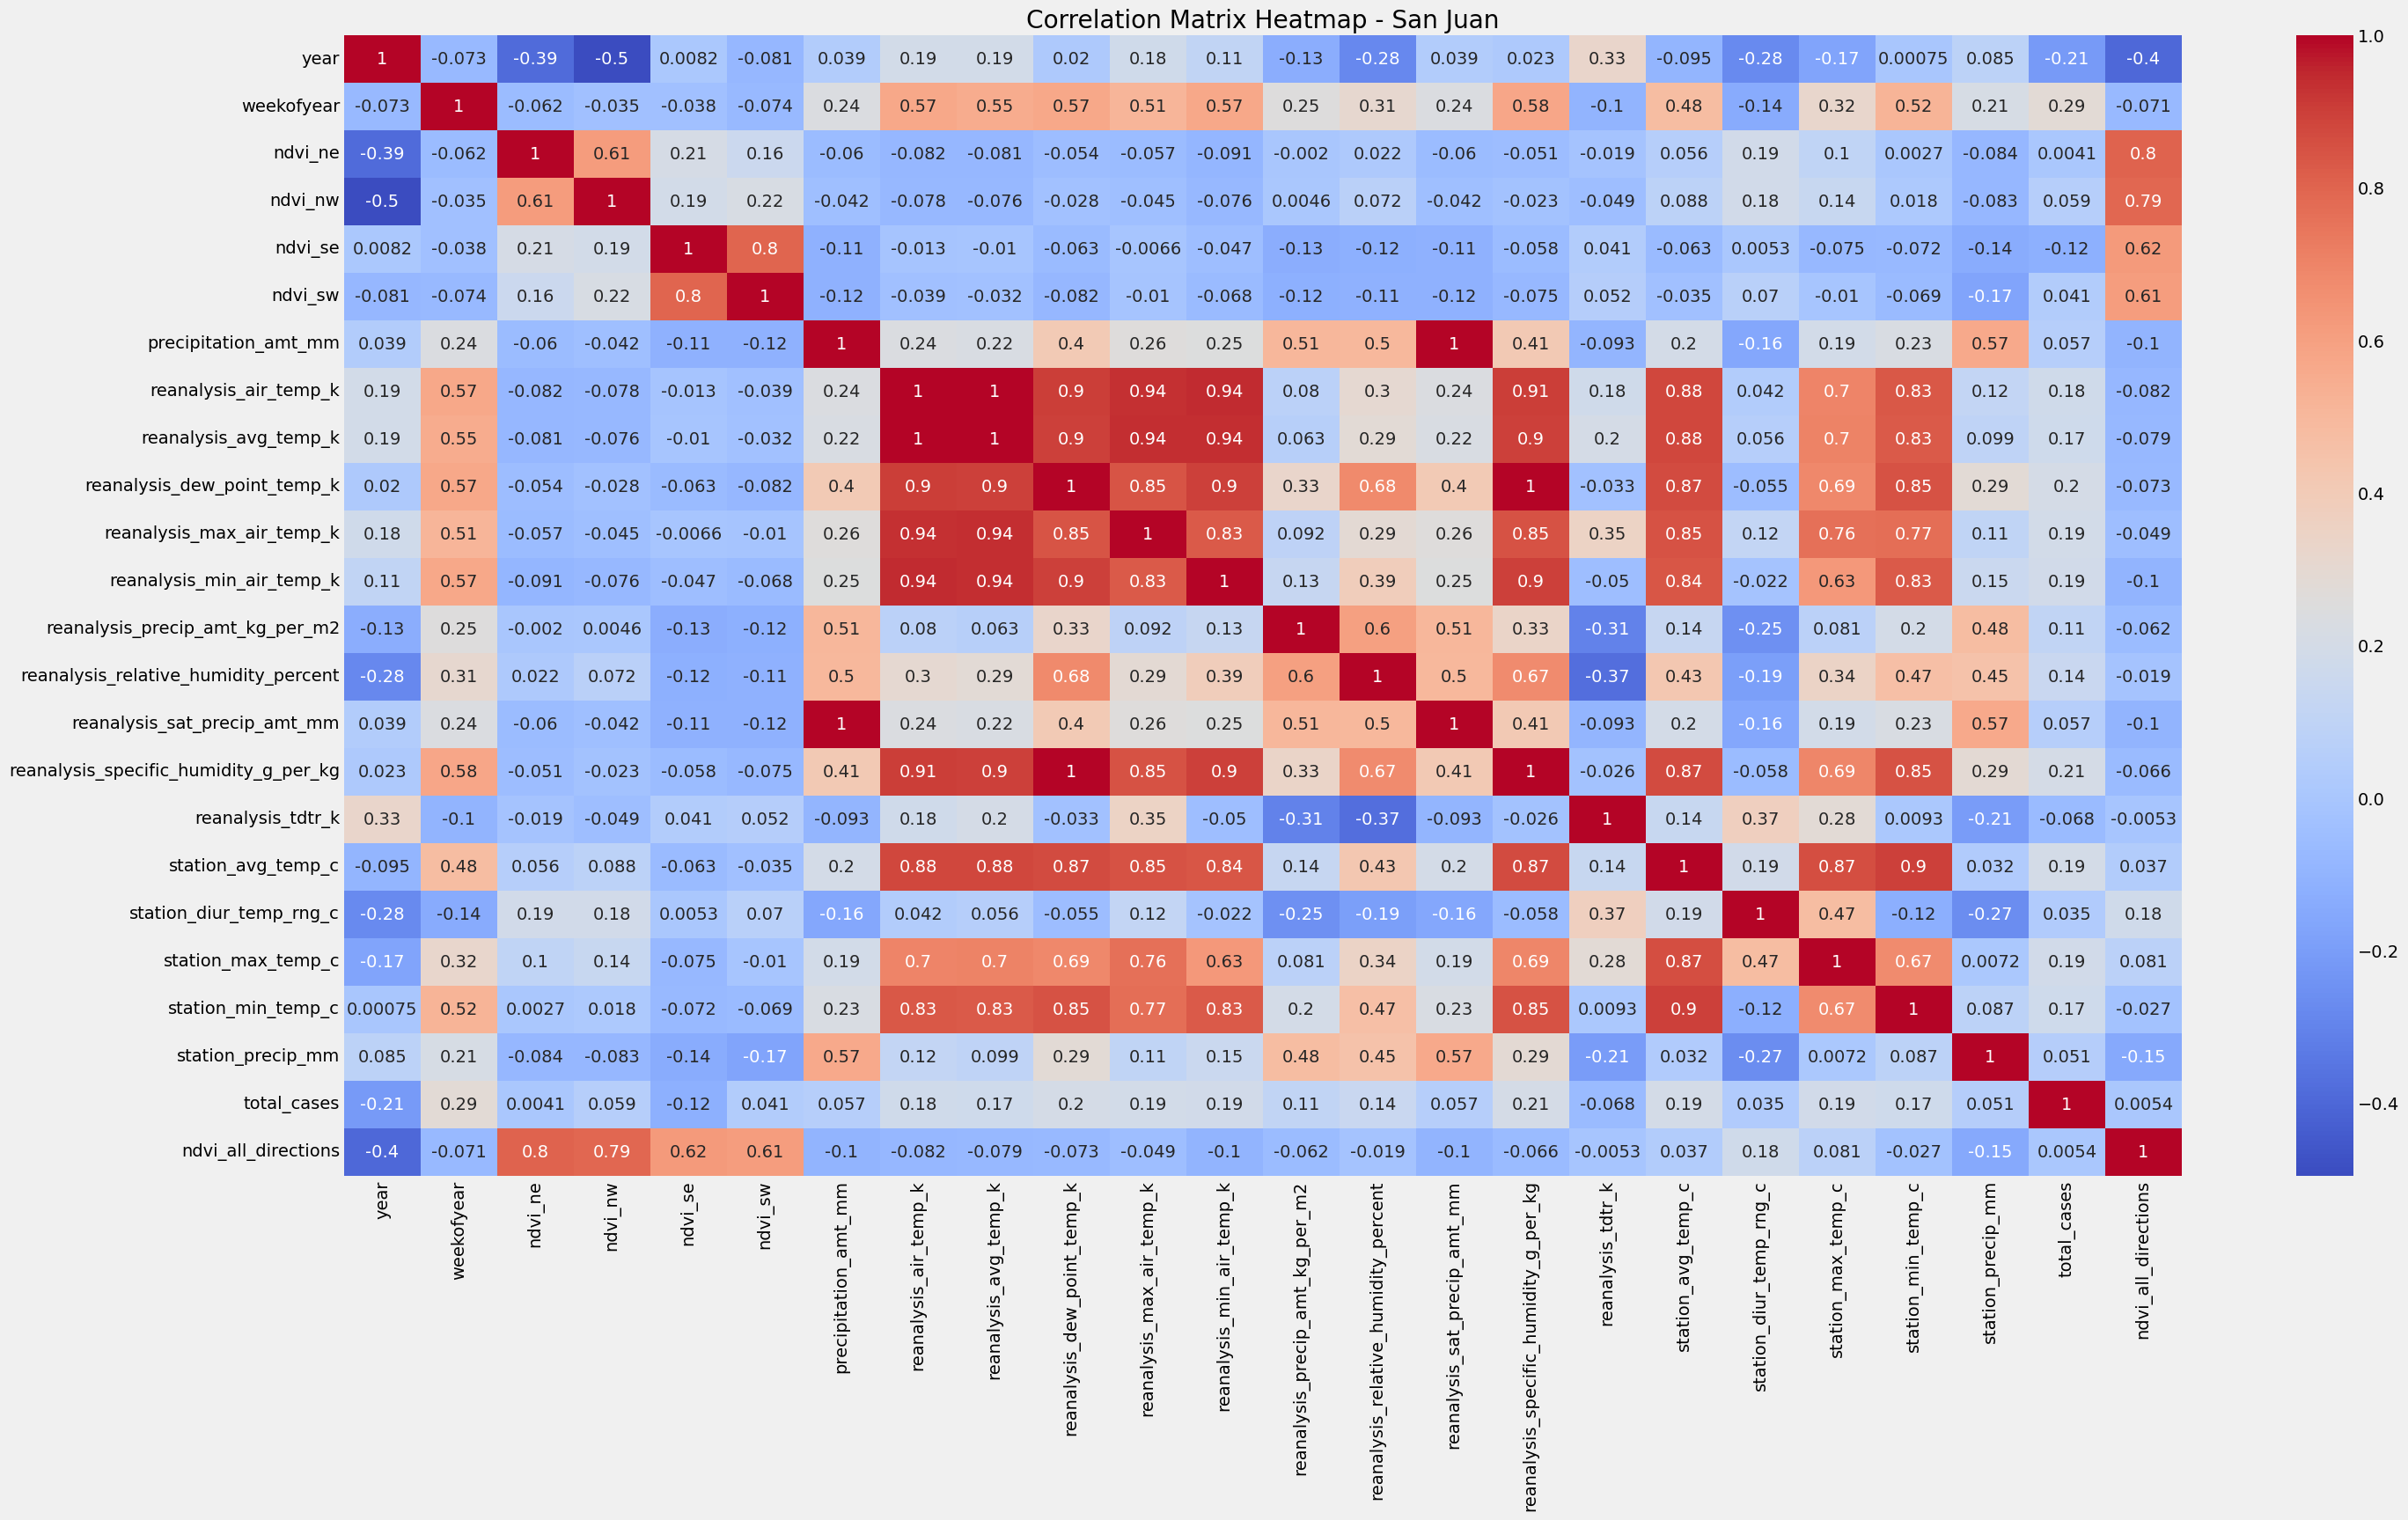

In [57]:
# San Juan
corr_sj = sj.corr()
plt.figure(figsize=(30, 16))
sns.heatmap(corr_sj, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - San Juan')
plt.show()


The overall number of dengue cases apparently has no relationship to any characteristic.

Temperature: Reanalysis_air_temp_k to Reanalysis_min_air_temp_k are significantly associated in San Juan when it comes to temperature.


In [58]:
#checking columns

In [59]:
sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'ndvi_all_directions', 'ndvi_desc'],
      dtype='object')

<AxesSubplot: >

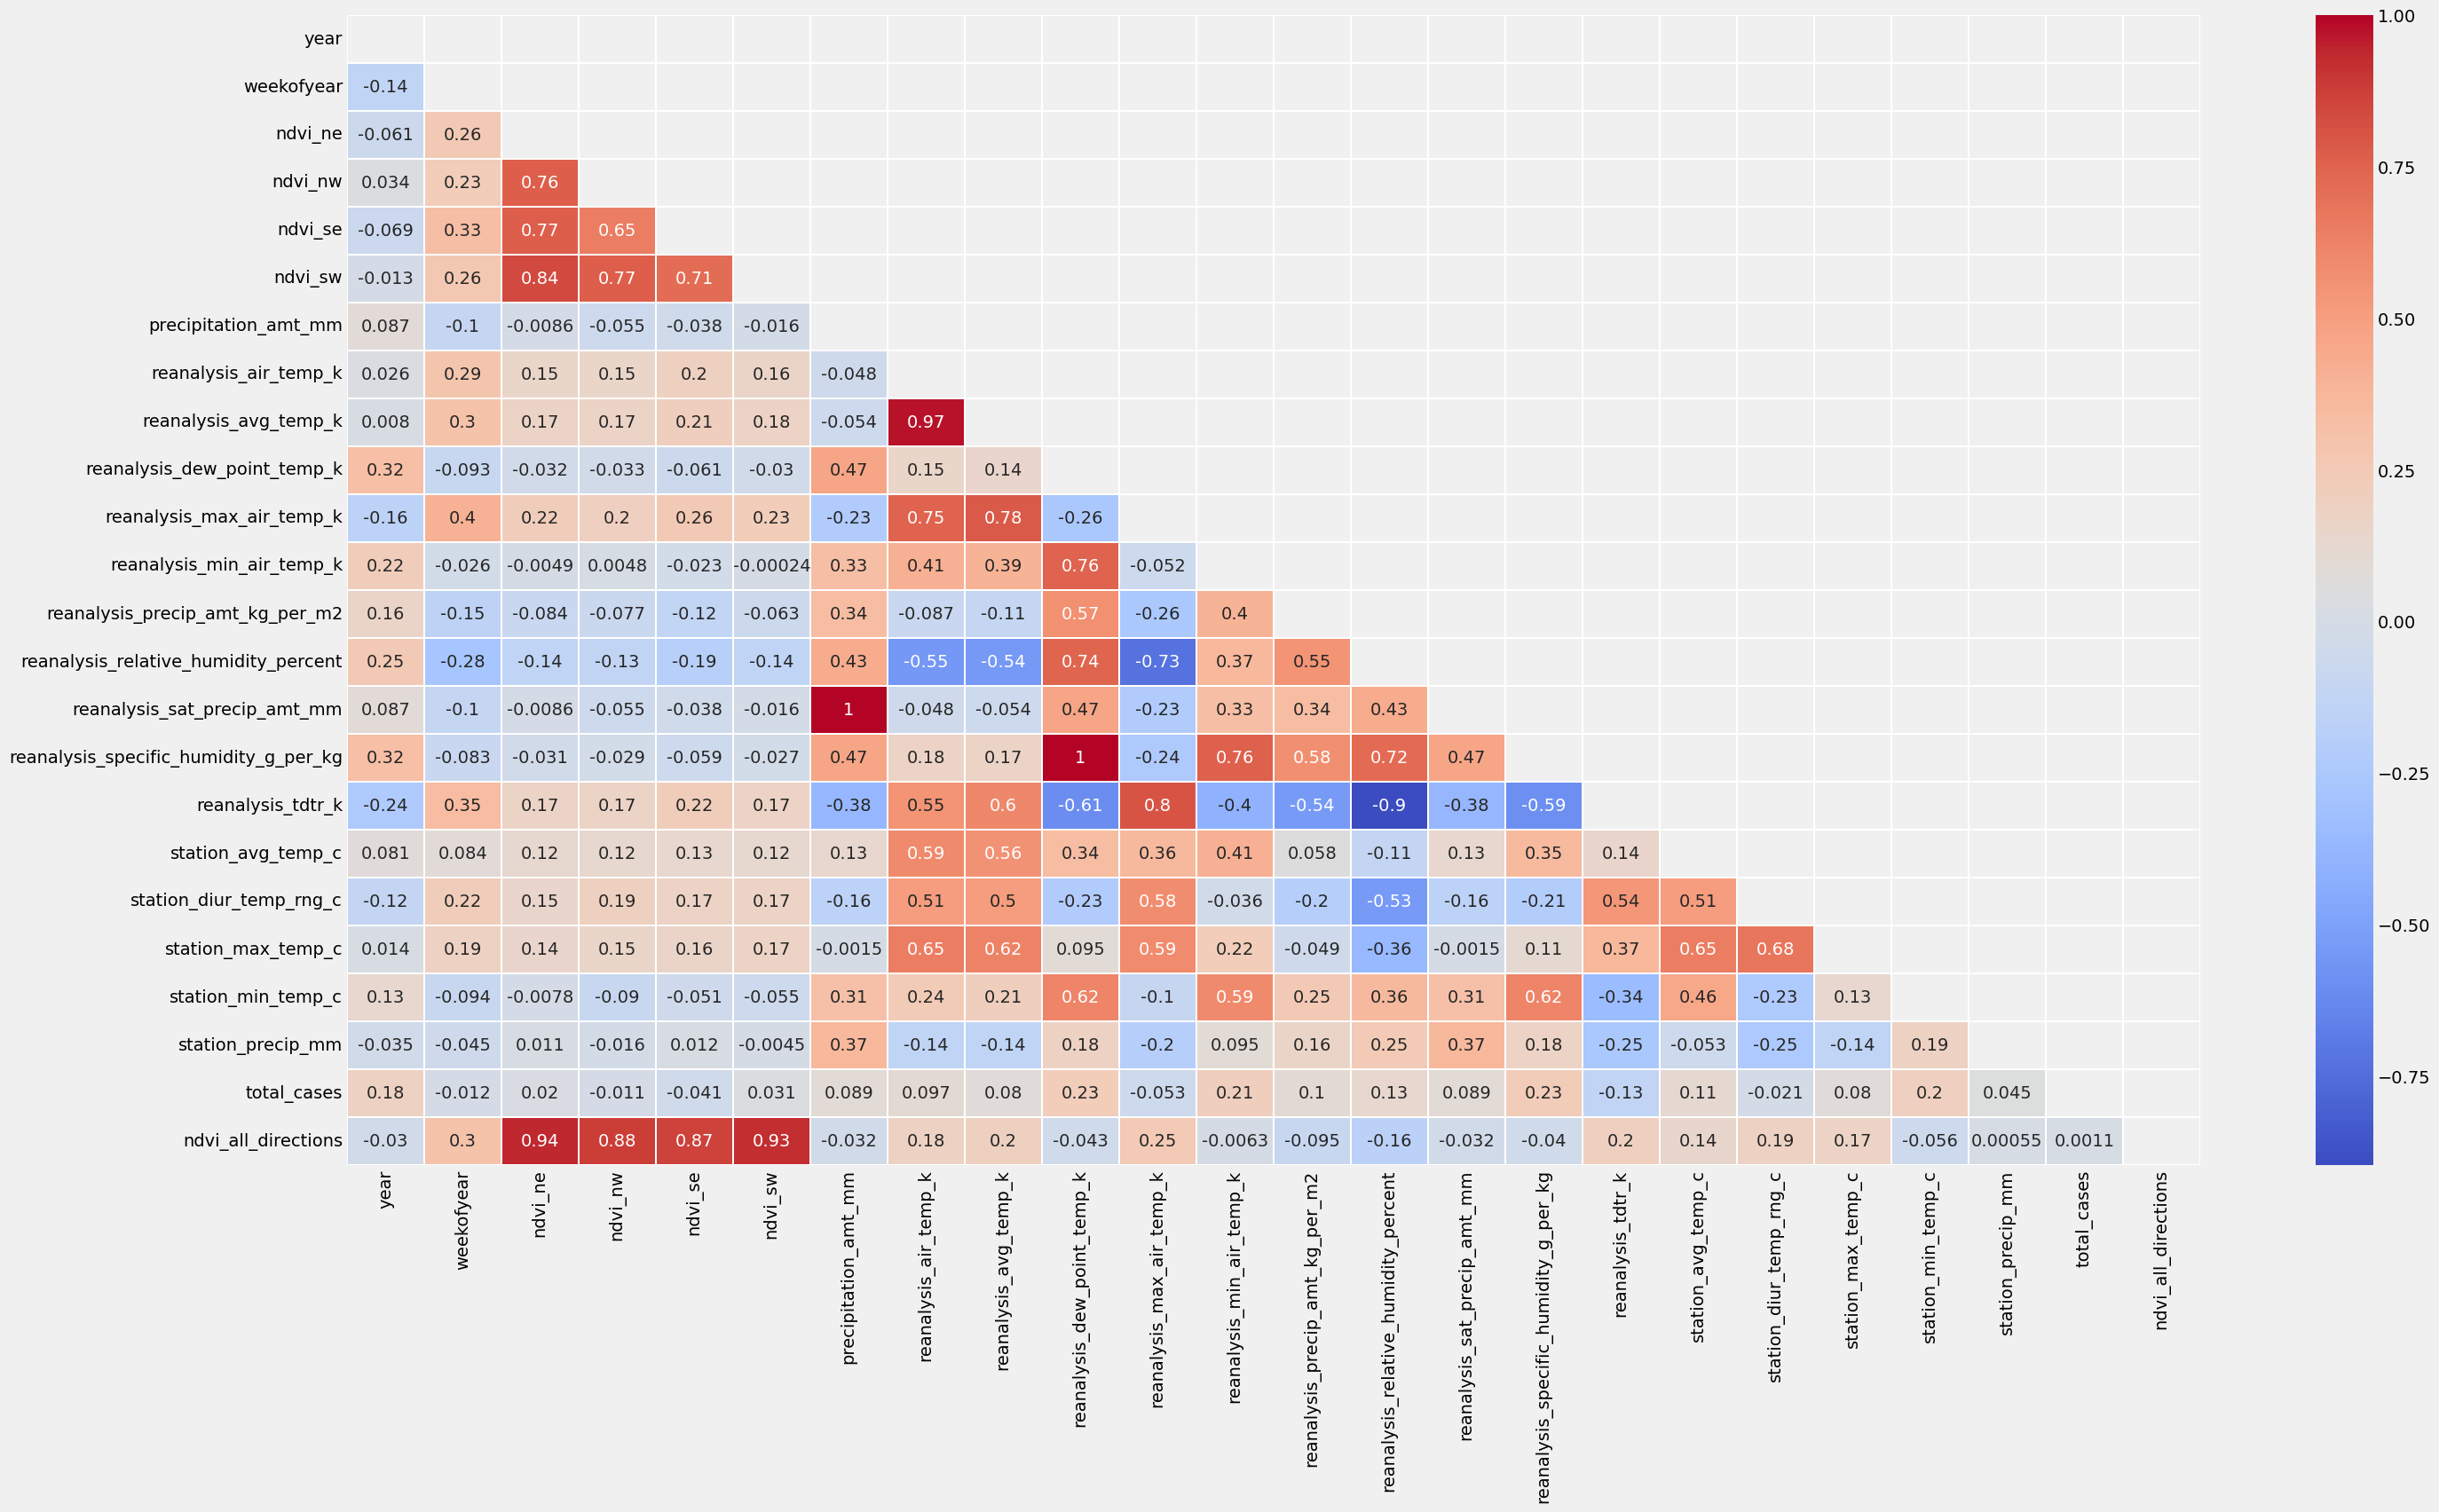

In [61]:
#Iquitos
corr = iq.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 16))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=.3, ax=ax)


In Iquitos, there is a correlation between the NVDI for the north and south east.

There is no association between the overall number of cases in Iquitos and anything.

The amount of precipitation has remained steady over time.


In [62]:
#creating copies for our datasets
sj_new = sj.copy()
iq_new = iq.copy()

**Climatic Conditions(Weather)**

We must standardise meteorological conditions in order to do away with the units in order to visualise them.


In [63]:
from sklearn.preprocessing import StandardScaler

# Standardizing San Juan Features
scaler = StandardScaler()
features = sj_new.columns[8:24]
scaled_sj = scaler.fit_transform(sj_new[features])
scaled_sj = pd.DataFrame(scaled_sj, columns=features, index=sj_new.index)
scaled_sj['weekofyear'] = sj_new['weekofyear']

# Standardizing Iquitos features
features2 = iq_new.columns[8:24]
scaled_iq = scaler.fit_transform(iq_new[features2])
scaled_iq = pd.DataFrame(scaled_iq, columns=features2, index=iq_new.index)
scaled_iq['weekofyear'] = iq_new['weekofyear']
scaled_iq.head()


precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
936             -1.108024              -0.965058              -0.511702   
937             -0.106517              -1.055384              -0.527794   
938             -0.251337              -1.242140              -1.305601   
939             -1.671656              -2.146624              -2.179963   
940             -0.045345              -1.227492              -1.123219   

     reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
936                    -0.222531                   0.097625   
937                    -0.099187                  -0.195572   
938                     0.087852                  -1.075160   
939                    -1.911946                  -1.452127   
940                    -1.090998                  -0.028031   

     reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
936                   0.132999                        -0.287564   
937                  -1.070817                        -0.231451   
938                  -0.167955                         0.143368   
939                  -2.575587                        -0.671569   
940                  -0.830054                        -0.515012   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
936                              0.495401                     -1.108024   
937                              0.648949                     -0.106517   
938                              0.948312                     -0.251337   
939                             -0.189153                     -1.671656   
940                             -0.066729                     -0.045345   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
936                              -0.312550          -0.106482   
937                              -0.165894           0.458286   
938                               0.012472          -0.735296   
939                              -1.852441          -0.030791   
940                              -1.149878           0.126412   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
936           -1.218294                 0.188781           -1.083150   
937           -0.667693                 0.696203            0.024569   
938           -0.777813                 0.632107           -0.713910   
939           -1.915722                 0.033884           -1.821628   
940           -0.998054                 0.640653           -0.492367   

     station_min_temp_c  station_precip_mm  weekofyear  
936           -0.406188          -0.931223          26  
937           -0.326603          -0.095081          27  
938           -0.406188          -0.373265          28  
939           -5.181264          -0.502025          29  
940           -1.679541          -0.915327          30

We shall plot our weather conditions against each week of the year since weather conditions are best characterised at specific times of the year.


**Distribution of Total Cases Over the years.**

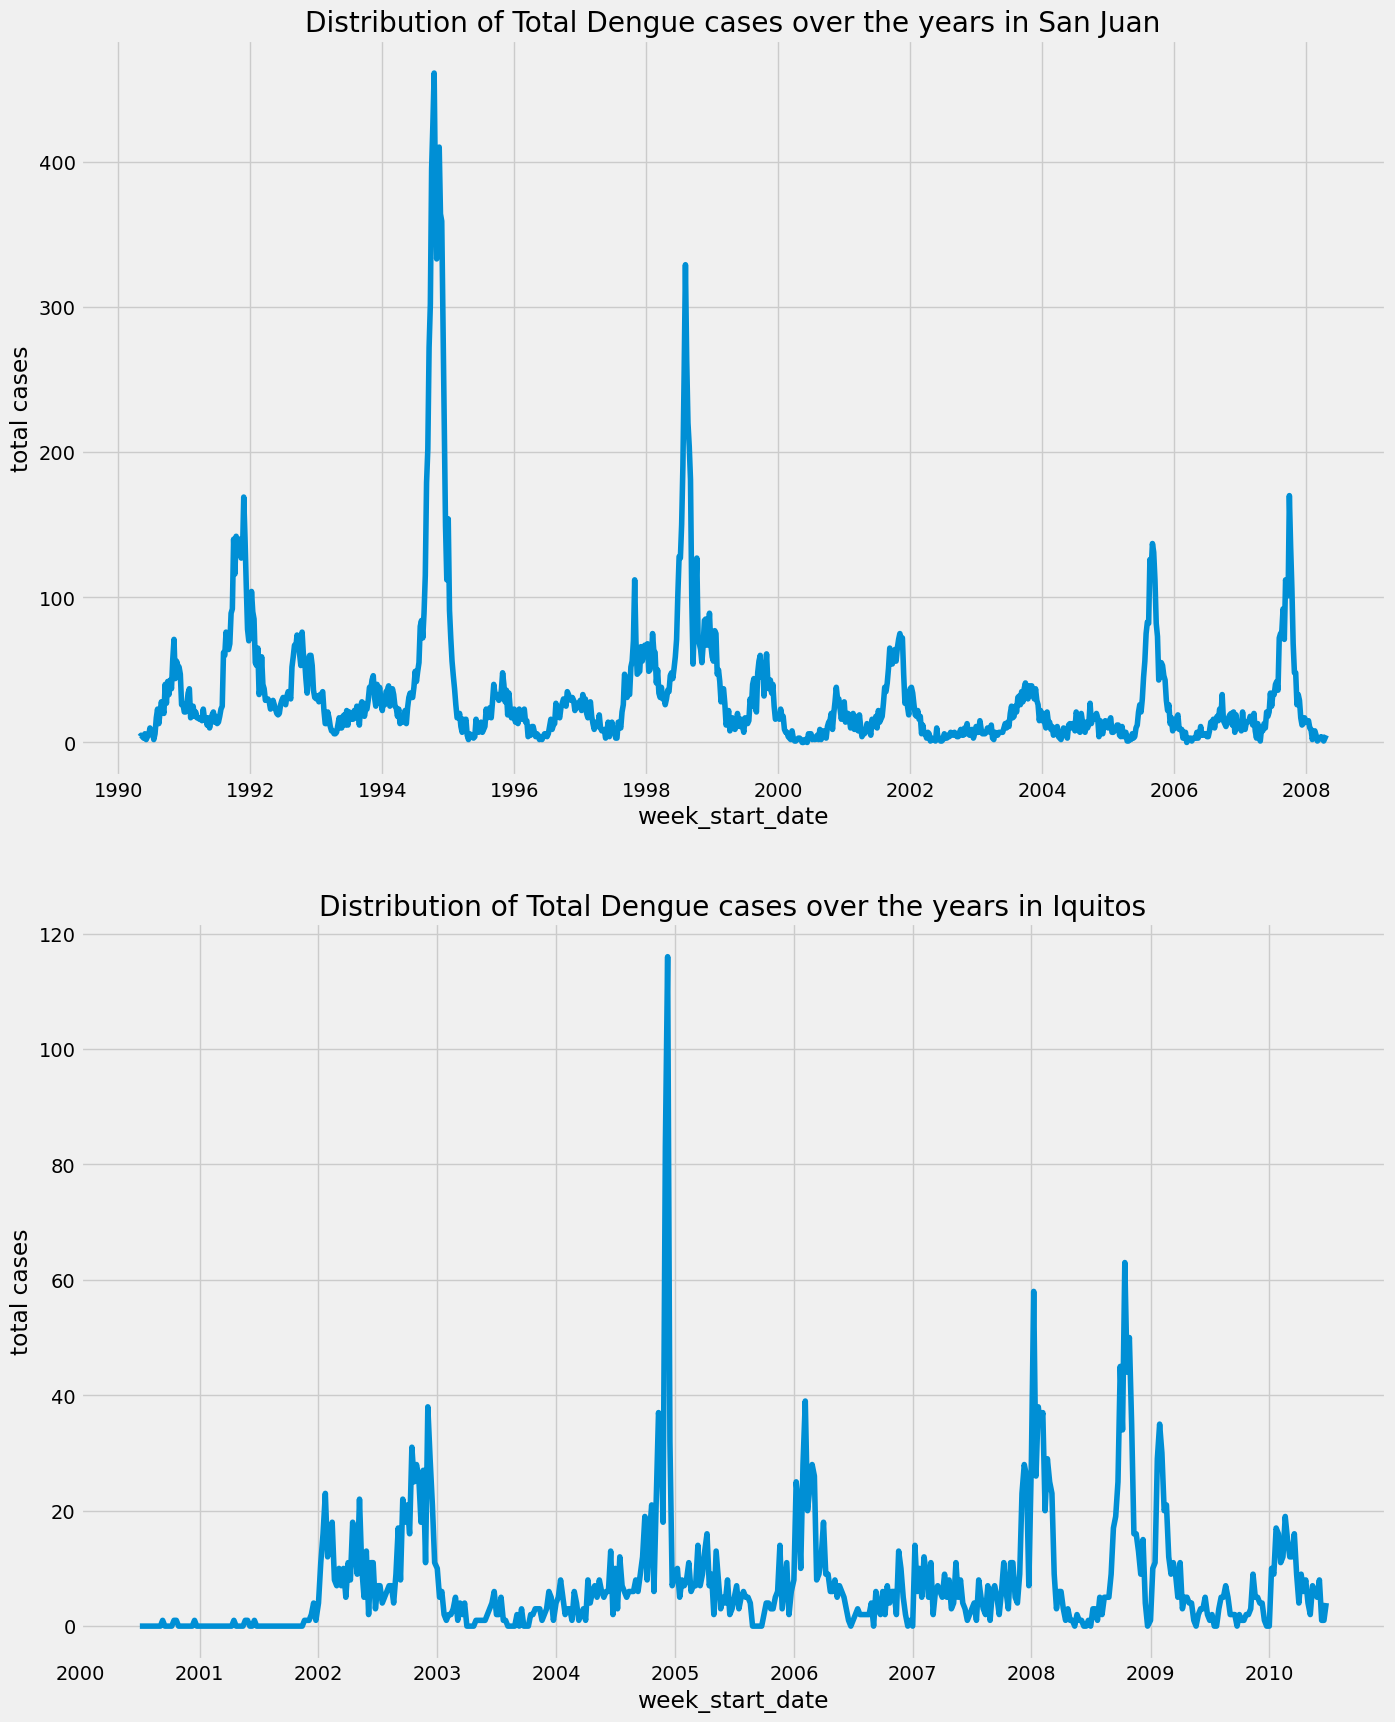

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, figsize=(15, 20))
axes[0].set_title('Distribution of Total Dengue cases over the years in San Juan')
axes[1].set_title('Distribution of Total Dengue cases over the years in Iquitos')

sns.lineplot(x='week_start_date', y='total_cases', data=sj, ax=axes[0])
sns.lineplot(x='week_start_date', y='total_cases', data=iq, ax=axes[1])

axes[0].set_ylabel('total cases')
axes[1].set_ylabel('total cases')

plt.show()


**New Juan**

In San Juan, Puerto Rico, there were a lot of dengue cases reported between June 1994 and May 1995. Hospitalisations due to this outbreak were most prevalent.

Additionally, there were a lot of instances of dengue infection reported around the start of 1999.

**Iquitos**

In Iquitos, dengue incidences peaked at the end of 2004 and early in 2005 and again increased between 2008 and 2009.linking text

This outliers might be thought of as breakouts.


**Distribution of Total Cases over the weeks.**

In [65]:
#1 San Juan, Puerto Rico.

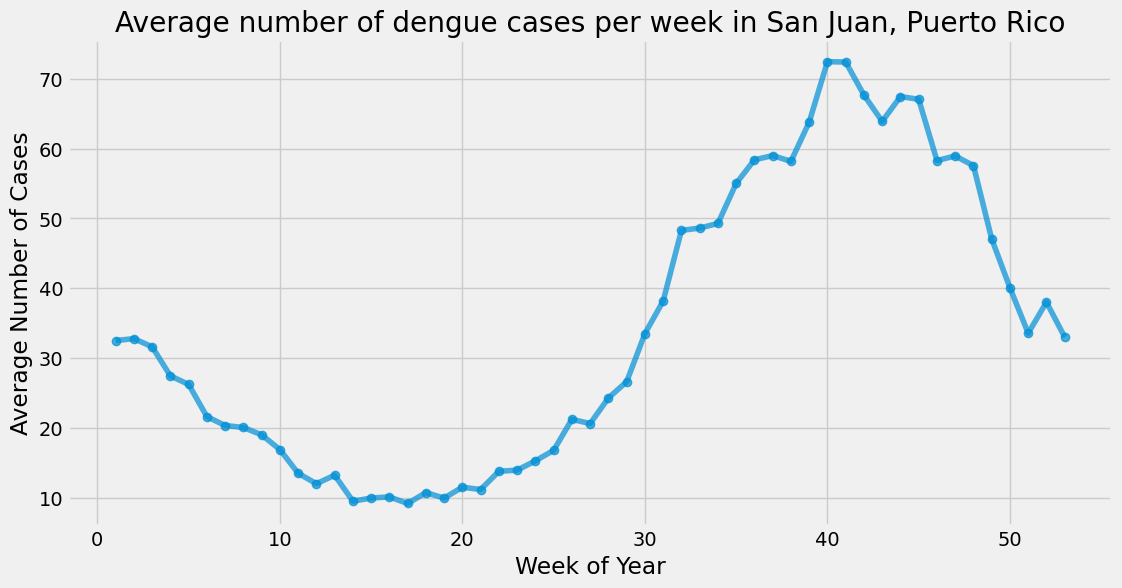

In [66]:
# create a copy of scaled_sj
df = scaled_sj.copy()

# add the 'total_cases' column to the dataframe
df['total_cases'] = sj['total_cases']

# group by week of year and calculate the mean of 'total_cases'
sj_weekly_mean = df.groupby('weekofyear')['total_cases'].mean()

# plot the weekly mean dengue cases in San Juan
plt.figure(figsize=(12,6))
plt.plot(sj_weekly_mean, '-o', alpha=0.7)
plt.title('Average number of dengue cases per week in San Juan, Puerto Rico')
plt.xlabel('Week of Year')
plt.ylabel('Average Number of Cases')
plt.show()


The average number of cases recorded each week in San Juan, Puerto Rico, is typically low from the start of week 10 (March) to week 20 (May), then climbs and peaks around week 40, or about October, before gradually declining again.


In [67]:
#Iquitos

Text(0.5, 0, 'Week of Year')

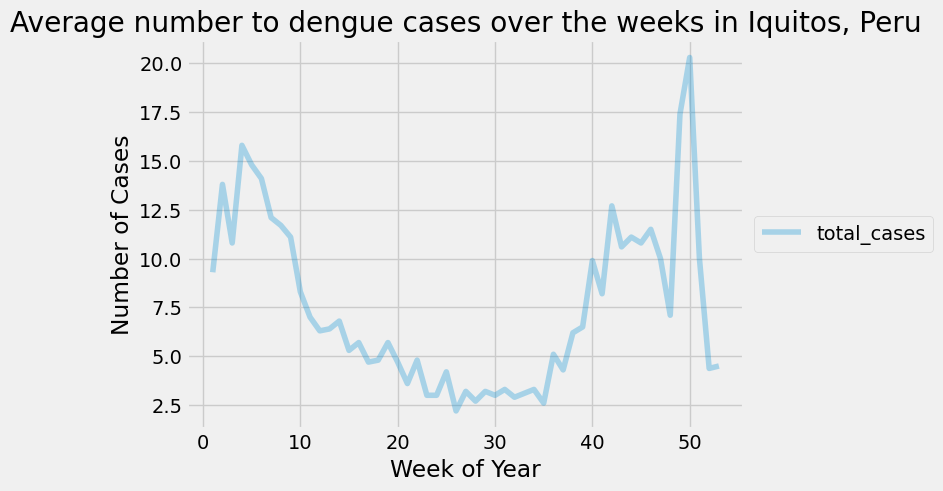

In [68]:
df2 = scaled_iq.copy()
df2['total_cases'] = iq['total_cases']

# selecting columns
df3 = df2[['total_cases','weekofyear']]

df3.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in Iquitos, Peru')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')


Dengue cases in Iquitos increase starting in week 35 and reach their peak in week 50 (December), after which they decline for two weeks before rising once again in January. In the middle of the year, there are fewer cases.


**Feature Engineering**

Some columns from the San Juan data frame ('sj') and the San Juan test data frame ('sj_test') that are deemed unnecessary for the dengue fever prediction model are being removed by the code. The final data frames ('final_sj' and 'final_sjtest') include just the crucial components for the model, which can increase the model's accuracy.


In [69]:
#Train set

final_sj = sj.drop(['year','week_start_date','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
                      'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','ndvi_all_directions','ndvi_desc','city'],axis=1)

#Test set
final_sjtest = sj_test.drop(['year','week_start_date','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
                      'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','city'],axis=1)
final_sjtest.head()
     

weekofyear  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0          18  -0.0189 -0.018900  0.102729  0.091200   
1          19  -0.0180 -0.012400  0.082043  0.072314   
2          20  -0.0015 -0.012400  0.151083  0.091529   
3          21  -0.0015 -0.019867  0.124329  0.125686   
4          22   0.0568  0.039833  0.062267  0.075914   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1

In [70]:
print(final_sj.shape)
print(final_sjtest.shape)

(936, 14)
(260, 13)


In [71]:
# Iquitos data train
final_iq = iq.drop(['year','week_start_date','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k','reanalysis_sat_precip_amt_mm','precipitation_amt_mm','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
                  'reanalysis_avg_temp_k','ndvi_desc','ndvi_all_directions','city'],axis=1)
print(final_iq.head())

#test
final_iqtest = iq_test.drop(['year','week_start_date','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k','reanalysis_sat_precip_amt_mm','precipitation_amt_mm','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
                  'reanalysis_avg_temp_k','city'],axis=1)
print(final_iqtest.head())

     weekofyear  reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
936          26                      307.3                      293.1   
937          27                      306.6                      291.1   
938          28                      304.5                      292.6   
939          29                      303.6                      288.6   
940          30                      307.0                      291.5   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
936                            43.19                             92.418571   
937                            46.00                             93.581429   
938                            64.77                             95.848571   
939                            23.96                             87.234286   
940                            31.80                             88.161429   

     reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
936           8.92857

In [72]:
print(final_iq.shape)
print(final_iqtest.shape)

(520, 12)
(156, 11)


A machine learning model based on neural networks called the MLPRegressor (Multilayer Perceptron Regressor) is useful for regression problems. It can generate predictions based on the complicated nonlinear interactions it learns between the input variables (such as temperature, humidity, etc.) and the output variable (the number of Dengue cases).

MLPRegressor may be used in this project to train a model using historical data of Dengue cases and meteorological factors, which can then be used to forecast the number of cases for the test data. By doing so, we can forecast upcoming epidemics and pinpoint the elements that are most directly linked to the transmission of dengue.


**MLP Regressor for Test Prediction**

In [73]:
#Libraries necessary for multilayer perceptron

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
     

In [74]:
#Creating train and test
X_train = final_sj.drop(labels=['total_cases'], axis=1)
y_train = final_sj['total_cases']
X_test = final_sjtest

# Standardizing the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#building model
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

#predict
y_pred = mlp_reg.predict(X_test).astype(int)

pred_sj = pd.DataFrame(y_pred, columns=["total_cases"])
pred_sj.insert(0, 'city', 'sj')
pred_sj

city  total_cases
0     sj           10
1     sj            5
2     sj           11
3     sj           35
4     sj           28
..   ...          ...
255   sj            3
256   sj            1
257   sj            2
258   sj           -8
259   sj            7

[260 rows x 2 columns]

In [75]:
#Tuning Model

In [76]:
#building new fitted model
mlp_reg = MLPRegressor()

param_grid = {
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']
          }

gsc = GridSearchCV(
    mlp_reg,
    param_grid,
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

In [77]:
best_params = grid_result.best_params_
best_params

{'activation': 'logistic',
 'alpha': 0.0001,
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [78]:
#predict
y_pred =grid_result.predict(X_test).astype(int)

#making the predictions the total cases entry of the test set
pred_sj = pd.DataFrame(y_pred, columns=["total_cases"])
pred_sj.insert(0, 'city', 'sj')

#view the final test set
pred_sj



city  total_cases
0     sj           21
1     sj           19
2     sj           15
3     sj           20
4     sj           25
..   ...          ...
255   sj           19
256   sj           25
257   sj           24
258   sj           16
259   sj           21

[260 rows x 2 columns]

In [79]:
#Iquitos.

In [80]:
#Separating train and test
X_trainiq = final_iq.drop(labels=['total_cases'], axis=1)
y_trainiq = final_iq['total_cases']
X_testiq = final_iqtest

#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trainiq)
X_test = scaler.transform(X_testiq)

#building model
clf = MLPRegressor()
clf.fit(X_trainiq, y_trainiq)

#predict
y_pred = clf.predict(X_testiq).astype(int)

pred_iq = pd.DataFrame(y_pred, columns=["total_cases"])
pred_iq.insert(0, 'city', 'iq')
pred_iq

city  total_cases
0     iq            5
1     iq            3
2     iq            9
3     iq            0
4     iq            3
..   ...          ...
151   iq           10
152   iq            7
153   iq            7
154   iq            2
155   iq            5

[156 rows x 2 columns]

In [81]:
#building new fitted model
mlp_reg = MLPRegressor()

param_grid = {
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['lbfgs','sgd','adam']
          }

gsc_iq = GridSearchCV(
    mlp_reg,
    param_grid,
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_resultiq = gsc_iq.fit(X_trainiq, y_trainiq)

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWa

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWa

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWa

In [82]:
#best params
best_params = grid_resultiq.best_params_
best_params

{'activation': 'relu',
 'alpha': 0.0001,
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [83]:
#predict
y_prediq =grid_resultiq.predict(X_testiq).astype(int)

#making the predictions the total cases entry of the test set
pred_iq = pd.DataFrame(y_prediq, columns=["total_cases"])
pred_iq.insert(0, 'city', 'Iquitos')

#view the final test set
pred_iq

city  total_cases
0    Iquitos            7
1    Iquitos            5
2    Iquitos            9
3    Iquitos            6
4    Iquitos            6
..       ...          ...
151  Iquitos           10
152  Iquitos            8
153  Iquitos            9
154  Iquitos            4
155  Iquitos            5

[156 rows x 2 columns]

Merge the predictions to the train set then go ahead to see if ARIMA does the same predictions.

In [84]:
#Merge features with total cases predictions

final_sjtest['total_cases'] = pred_sj['total_cases']  
final_sjtest

weekofyear  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0            18 -0.01890 -0.018900  0.102729  0.091200   
1            19 -0.01800 -0.012400  0.082043  0.072314   
2            20 -0.00150 -0.012400  0.151083  0.091529   
3            21 -0.00150 -0.019867  0.124329  0.125686   
4            22  0.05680  0.039833  0.062267  0.075914   
..          ...      ...       ...       ...       ...   
255          13 -0.08740 -0.016183  0.156343  0.105186   
256          14 -0.20325 -0.077833  0.204171  0.178914   
257          15 -0.11760 -0.008200  0.192700  0.170429   
258          16  0.08275  0.031200  0.135014  0.074857   
259          17 -0.08730 -0.048667  0.129814  0.117671   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                              25.37                             78.781429   
1                              21.83                             78.230000   
2                               4.12                             78.270000   
3                               2.20                             73.015714   
4                               4.36                             74.084286   
..                               ...                                   ...   
255                             2.55                             78.780000   
256                            64.30                             81.650000   
257                             0.70                             78.285714   
258                             1.40                             77.674286   
259                            19.90                             79.045714   

     reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0             3.128571           26.528571                 7.057143   
1             2.571429           26.071429                 5.557143   
2             4.428571           27.928571                 7.785714   
3             4.342857           28.057143                 6.271429   
4             3.542857           27.614286                 7.085714   
..                 ...                 ...                      ...   
255           3.314286           27.542857                 7.942857   
256           2.828571           26.642857                 6.642857   
257           3.171429           27.914286                 8.114286   
258           3.042857           27.728571                 6.942857   
259           2.342857           26.442857                 6.742857   

     station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                  33.3                21.7               75.2           21  
1                  30.0                22.2               34.3           19  
2                  32.8                22.8                3.0           15  
3                  33.3                24.4                0.3           20  
4                  33.3                23.3               84.1           25  
..                  ...                 ...                ...          ...  
255                33.9                22.8                3.5           19  
256                33.3                22.8               17.6           25  
257                32.8                23.3                9.4           24  
258                31.7                23.9               22.9           16  
259                31.1                21.7               47.5           21  

[260 rows x 14 columns]

In [85]:
final_iqtest.head()

weekofyear  reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
260          26                      307.9                      293.7   
261          27                      307.7                      292.2   
262          28                      306.4                      292.5   
263          29                      306.4                      289.3   
264          30                      308.1                      290.5   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
260                            34.11                             92.581429   
261                             9.10                             83.885714   
262                            61.09                             92.057143   
263                            19.60                             88.970000   
264                            18.93                             78.610000   

     reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
260           9.428571              27.440                   10.760   
261          10.157143              27.025                    9.625   
262           9.557143              26.950                   10.350   
263           7.828571              26.900                    9.700   
264          11.771429              27.050                   11.850   

     station_max_temp_c  station_min_temp_c  station_precip_mm  
260                33.8                21.5               11.2  
261                33.0                21.2                8.9  
262                33.4                21.6               22.6  
263                33.3                14.2                4.8  
264                33.5                16.9                3.0

In [86]:
c = final_iqtest.copy()
d = iq_test.copy()
h= iq_test['week_start_date']

In [87]:
c = c.reset_index()
d = d.reset_index()
h = h.reset_index()
d.columns

Index(['index', 'city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne',
       'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [88]:
c = c.drop('index',1 )
d = d.drop('index',1)
h = h.drop('index',1)
h

week_start_date
0        2010-07-02
1        2010-07-09
2        2010-07-16
3        2010-07-23
4        2010-07-30
..              ...
151      2013-05-28
152      2013-06-04
153      2013-06-11
154      2013-06-18
155      2013-06-25

[156 rows x 1 columns]

In [89]:
h.columns

Index(['week_start_date'], dtype='object')

In [90]:
iq_test['week_start_date']

260   2010-07-02
261   2010-07-09
262   2010-07-16
263   2010-07-23
264   2010-07-30
         ...    
411   2013-05-28
412   2013-06-04
413   2013-06-11
414   2013-06-18
415   2013-06-25
Name: week_start_date, Length: 156, dtype: datetime64[ns]

In [91]:
c['total_cases'] = pred_iq['total_cases']
c['week_start_date'] = h['week_start_date']

final_iqtest = c
final_iqtest

weekofyear  reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0            26                      307.9                      293.7   
1            27                      307.7                      292.2   
2            28                      306.4                      292.5   
3            29                      306.4                      289.3   
4            30                      308.1                      290.5   
..          ...                        ...                        ...   
151          22                      305.5                      292.7   
152          23                      306.3                      291.6   
153          24                      304.6                      290.7   
154          25                      305.9                      292.5   
155          26                      307.3                      289.6   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                              34.11                             92.581429   
1                               9.10                             83.885714   
2                              61.09                             92.057143   
3                              19.60                             88.970000   
4                              18.93                             78.610000   
..                               ...                                   ...   
151                            67.60                             89.990000   
152                            45.70                             93.891429   
153                            45.22                             94.967143   
154                             4.70                             89.057143   
155                            27.80                             87.030000   

     reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0             9.428571              27.440                   10.760   
1            10.157143              27.025                    9.625   
2             9.557143              26.950                   10.350   
3             7.828571              26.900                    9.700   
4            11.771429              27.050                   11.850   
..                 ...                 ...                      ...   
151          10.100000              27.400                    9.050   
152           9.657143              27.520                   10.720   
153           7.385714              27.200                   10.075   
154           8.228571              26.700                    8.480   
155          11.542857              27.350                    9.675   

     station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  \
0                  33.8                21.5               11.2            7   
1                  33.0                21.2                8.9            5   
2                  33.4                21.6               22.6            9   
3                  33.3                14.2                4.8            6   
4                  33.5                16.9                3.0            6   
..                  ...                 ...                ...          ...   
151                32.6                21.8               33.0           10   
152                33.8                21.4               68.0            8   
153                32.6                21.6               93.2            9   
154                32.2                21.8               34.1            4   
155                32.6                22.0               14.9            5   

    week_start_date  
0        2010-07-02  
1        2010-07-09  
2        2010-07-16  
3        2010-07-23  
4        2010-07-30  
..              ...  
151      2013-05-28  
152      2013-06-04  
153      2013-06-11  
154      2013-06-18  
155      2013-06-25  

[156 rows x 13 columns]

**Final datasets**

In [92]:
#Merge test to train
final_iq
final_iqtest

final_iq['week_start_date'] = iq['week_start_date']

#final iq
iq_new = pd.concat([final_iq, final_iqtest])
iq_new.isnull().sum()

weekofyear                              0
reanalysis_max_air_temp_k               0
reanalysis_min_air_temp_k               0
reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_tdtr_k                       0
station_avg_temp_c                      0
station_diur_temp_rng_c                 0
station_max_temp_c                      0
station_min_temp_c                      0
station_precip_mm                       0
total_cases                             0
week_start_date                         0
dtype: int64

In [93]:
final_sjtest

weekofyear  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0            18 -0.01890 -0.018900  0.102729  0.091200   
1            19 -0.01800 -0.012400  0.082043  0.072314   
2            20 -0.00150 -0.012400  0.151083  0.091529   
3            21 -0.00150 -0.019867  0.124329  0.125686   
4            22  0.05680  0.039833  0.062267  0.075914   
..          ...      ...       ...       ...       ...   
255          13 -0.08740 -0.016183  0.156343  0.105186   
256          14 -0.20325 -0.077833  0.204171  0.178914   
257          15 -0.11760 -0.008200  0.192700  0.170429   
258          16  0.08275  0.031200  0.135014  0.074857   
259          17 -0.08730 -0.048667  0.129814  0.117671   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                              25.37                             78.781429   
1                              21.83                             78.230000   
2                               4.12                             78.270000   
3                               2.20                             73.015714   
4                               4.36                             74.084286   
..                               ...                                   ...   
255                             2.55                             78.780000   
256                            64.30                             81.650000   
257                             0.70                             78.285714   
258                             1.40                             77.674286   
259                            19.90                             79.045714   

     reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0             3.128571           26.528571                 7.057143   
1             2.571429           26.071429                 5.557143   
2             4.428571           27.928571                 7.785714   
3             4.342857           28.057143                 6.271429   
4             3.542857           27.614286                 7.085714   
..                 ...                 ...                      ...   
255           3.314286           27.542857                 7.942857   
256           2.828571           26.642857                 6.642857   
257           3.171429           27.914286                 8.114286   
258           3.042857           27.728571                 6.942857   
259           2.342857           26.442857                 6.742857   

     station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                  33.3                21.7               75.2           21  
1                  30.0                22.2               34.3           19  
2                  32.8                22.8                3.0           15  
3                  33.3                24.4                0.3           20  
4                  33.3                23.3               84.1           25  
..                  ...                 ...                ...          ...  
255                33.9                22.8                3.5           19  
256                33.3                22.8               17.6           25  
257                32.8                23.3                9.4           24  
258                31.7                23.9               22.9           16  
259                31.1                21.7               47.5           21  

[260 rows x 14 columns]

In [94]:
#merge test to train
final_sjtest
final_sj

#reintroducing week start date back to the dataset
final_sj['week_start_date'] = sj['week_start_date']
final_sjtest['week_start_date'] = sj_test['week_start_date']

#final sj
sj_new = pd.concat([final_sj, final_sjtest])
sj_new.isnull().sum()

weekofyear                              0
ndvi_ne                                 0
ndvi_nw                                 0
ndvi_se                                 0
ndvi_sw                                 0
reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_tdtr_k                       0
station_avg_temp_c                      0
station_diur_temp_rng_c                 0
station_max_temp_c                      0
station_min_temp_c                      0
station_precip_mm                       0
total_cases                             0
week_start_date                         0
dtype: int64

**Decomposition of San Juan data**

Decomposing enables us to see trends, seasonality or any noise in the data.

San Juan.

In [95]:

df_sj = sj_new[['week_start_date','total_cases']]
df_sj  = df_sj = df_sj.set_index('week_start_date')
df_sj

total_cases
week_start_date             
1990-04-30                 4
1990-05-07                 5
1990-05-14                 4
1990-05-21                 3
1990-05-28                 6
...                      ...
2013-03-26                19
2013-04-02                25
2013-04-09                24
2013-04-16                16
2013-04-23                21

[1196 rows x 1 columns]

In [96]:
ts = df_sj['total_cases']
ts

week_start_date
1990-04-30     4
1990-05-07     5
1990-05-14     4
1990-05-21     3
1990-05-28     6
              ..
2013-03-26    19
2013-04-02    25
2013-04-09    24
2013-04-16    16
2013-04-23    21
Name: total_cases, Length: 1196, dtype: int64

Data Exploration


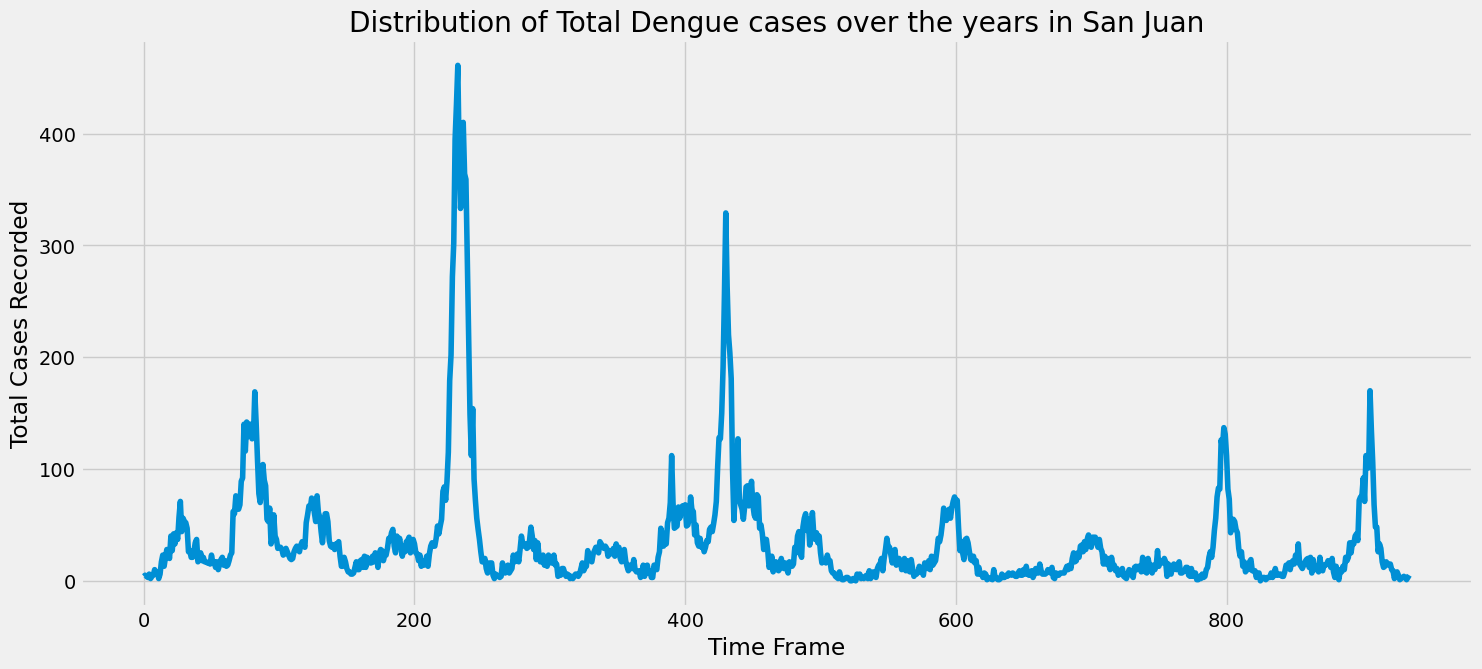

In [97]:
plt.figure(figsize=(16,7))
sns.lineplot(x=sj.index, y="total_cases", data=sj)
plt.xlabel('Time Frame')
plt.ylabel('Total Cases Recorded')
plt.title('Distribution of Total Dengue cases over the years in San Juan')
plt.show()

In [98]:
#The code imports the rcParams module from the pylab library which is used to set the plot figure size.
from pylab import rcParams

dec = sj[['week_start_date','total_cases']]
dec.set_index('week_start_date',inplace=True)
dec.head()

total_cases
week_start_date             
1990-04-30                 4
1990-05-07                 5
1990-05-14                 4
1990-05-21                 3
1990-05-28                 6

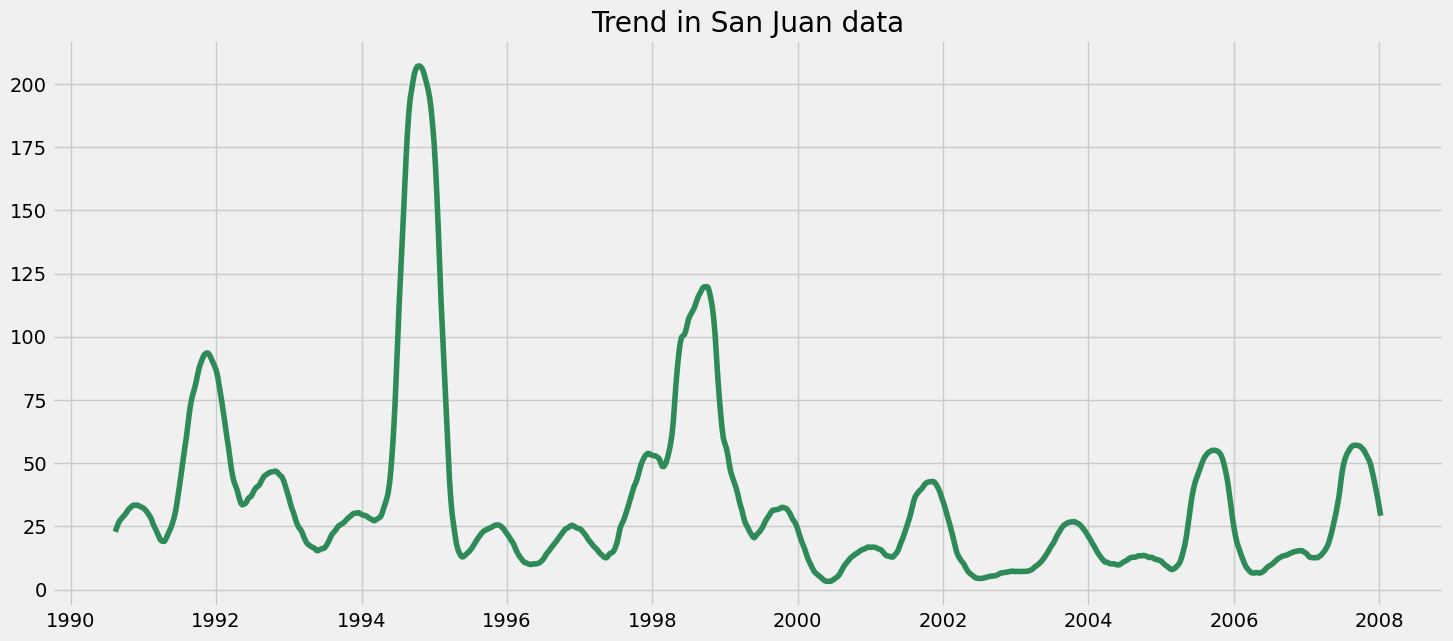

In [99]:
import statsmodels.api as sm

# create a time series object from the data
sj_ts = sj[['week_start_date', 'total_cases']].set_index('week_start_date')
sj_ts.index = pd.to_datetime(sj_ts.index)

# decompose the time series into three components
decomposition = sm.tsa.seasonal_decompose(sj_ts, model='additive', period=30)

# plot the trend component
plt.figure(figsize=(16, 7))
plt.plot(decomposition.trend, color='seagreen')
plt.title('Trend in San Juan data')
plt.show()


There is no clrear trend over the years

Text(0, 0.5, 'Seasonality')

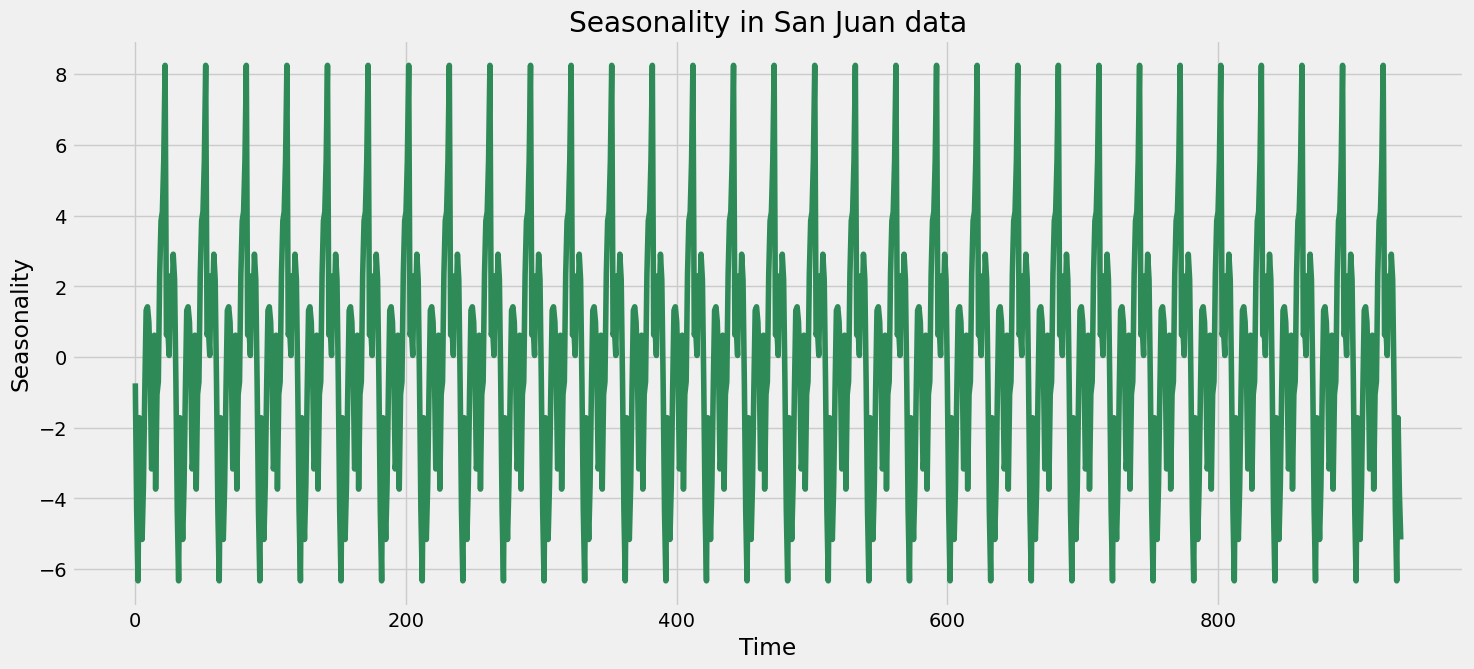

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into seasonal, trend, and residual components
result = seasonal_decompose(sj['total_cases'], model='additive', period=30)

# Plot the seasonal component of the time series
plt.figure(figsize=(16,7))
plt.plot(result.seasonal, color='seagreen')
plt.title('Seasonality in San Juan data')
plt.xlabel('Time')
plt.ylabel('Seasonality')


There is some seasonality visible in a duration of one year.

Text(0.5, 1.0, 'Residuals in San Juan data')

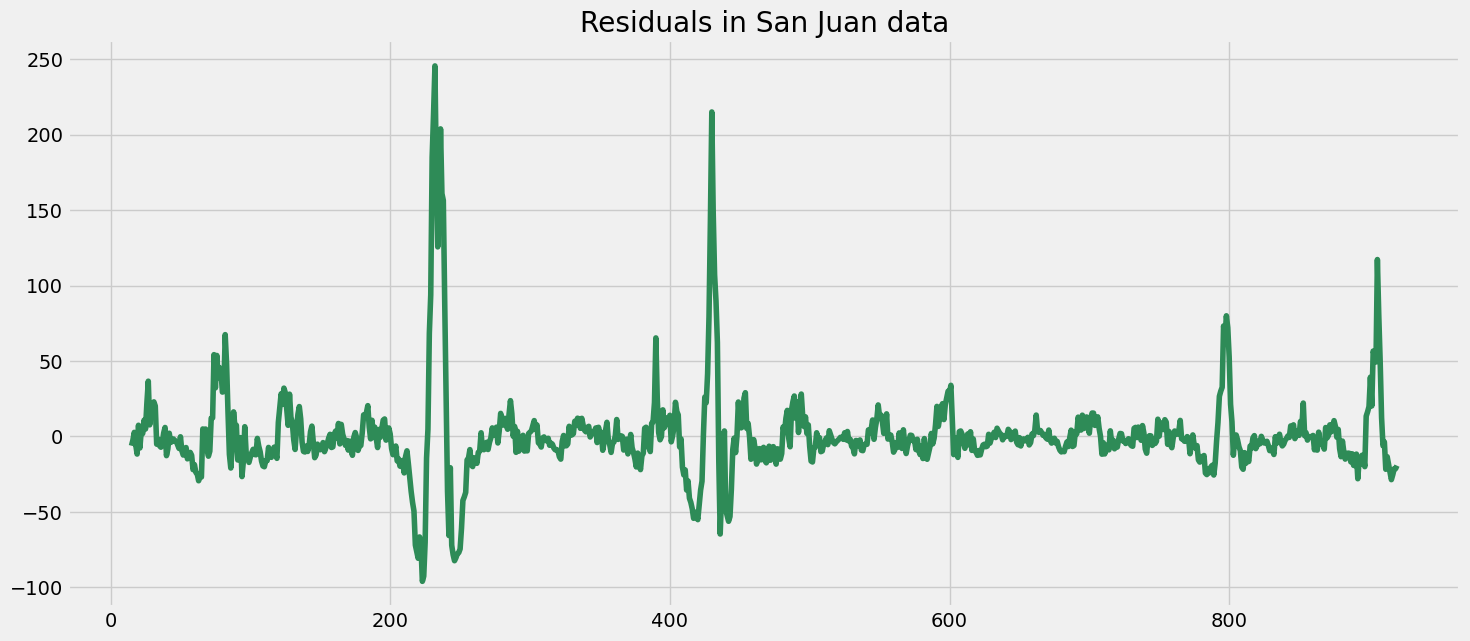

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(sj['total_cases'], model='additive', period=30)
residuals = result.resid

plt.figure(figsize=(16,7))
plt.plot(residuals, color='seagreen')
plt.title('Residuals in San Juan data')


These are unexpected events.

**Stationarity Check (San Juan data).**

In [102]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'  {key}: {value}')


ADF Statistic: -6.486634741473788
p-value: 1.2561598168940873e-08
Critical Values:
  1%: -3.4358897684764886
  5%: -2.8639862448409055
  10%: -2.5680724298154542


In this case, the ADF statistic is -6.488155605001473, which is less than the critical values at the 1%, 5%, and 10% levels. The p-value is 1.2458386901325834e-08, which is also less than 0.05 (or 5%). Therefore, we can reject the null hypothesis that the data is non-stationary, and conclude that the time series is stationary.

**ARIMA Model Implementation**

In [103]:
from statsmodels.tsa.arima.model import ARIMA 

In [104]:
#First model
###statsmodels.tsa.arima.model.ARIMA
newmodel = ARIMA(ts, order=(3,2,3))
results = newmodel.fit()

#Predictions
predictions_sj = results.predict('01/01/1991','01/01/2013')

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

In [105]:

#actual values
actuals = df_sj['01/01/1991':'01/01/2013']['total_cases'][0:1145] 

In [106]:
#checking on accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals[0:1145], predictions_sj)
print('MAE: %f' %mae)

MAE: 7.717269


In [107]:
#Tuning our model
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
for parameters in pdq:
  try:
    mod =ARIMA(ts, order=parameters)
    results_sj = mod.fit()
    print('ARIMA{} - AIC:{}' . format(parameters, results.aic))
  except:
    continue

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 0, 0) - AIC:9435.52991462428
ARIMA(0, 0, 1) - AIC:9435.52991462428
ARIMA(0, 1, 0) - AIC:9435.52991462428
ARIMA(0, 1, 1) - AIC:9435.52991462428
ARIMA(1, 0, 0) - AIC:9435.52991462428
ARIMA(1, 0, 1) - AIC:9435.52991462428
ARIMA(1, 1, 0) - AIC:9435.52991462428
ARIMA(1, 1, 1) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

In [108]:
#new predictions

predictions_sj = results_sj.predict('01/01/1991','01/01/2013')

In [109]:
#new mae
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals[0:1145], predictions_sj)
print('MAE: %f' %mae)

MAE: 7.635039


There is a slight difference in our MAE

**Decomposing Iquitos Data.**

In [110]:
df_iq = iq_new[['week_start_date','total_cases']]
df_iq  = df_iq.set_index('week_start_date')
df_iq

total_cases
week_start_date             
2000-07-01                 0
2000-07-08                 0
2000-07-15                 0
2000-07-22                 0
2000-07-29                 0
...                      ...
2013-05-28                10
2013-06-04                 8
2013-06-11                 9
2013-06-18                 4
2013-06-25                 5

[676 rows x 1 columns]

In [111]:
ts1 = df_iq['total_cases']
ts1
     

week_start_date
2000-07-01     0
2000-07-08     0
2000-07-15     0
2000-07-22     0
2000-07-29     0
              ..
2013-05-28    10
2013-06-04     8
2013-06-11     9
2013-06-18     4
2013-06-25     5
Name: total_cases, Length: 676, dtype: int64

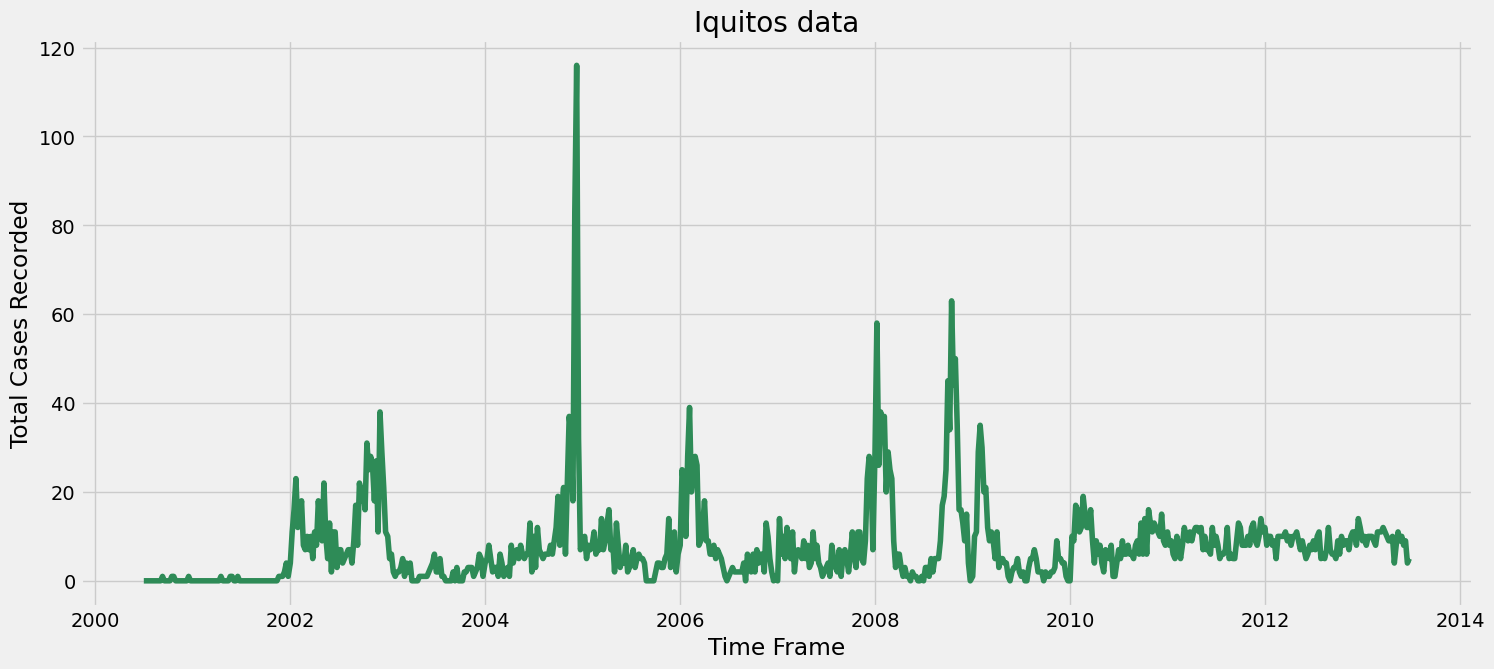

In [112]:
import matplotlib.pyplot as plt

# Data Exploration
fig, ax = plt.subplots(figsize=(16, 7))
ax.set_xlabel('Time Frame')
ax.set_ylabel('Total Cases Recorded')
ax.plot(ts1, color='seagreen')
ax.set_title('Iquitos data')
plt.show()


In [113]:


dec_iq = iq_new[['week_start_date','total_cases']].set_index('week_start_date')
dec_iq.head()


total_cases
week_start_date             
2000-07-01                 0
2000-07-08                 0
2000-07-15                 0
2000-07-22                 0
2000-07-29                 0

Text(0.5, 1.0, 'Trend in Iquitos data')

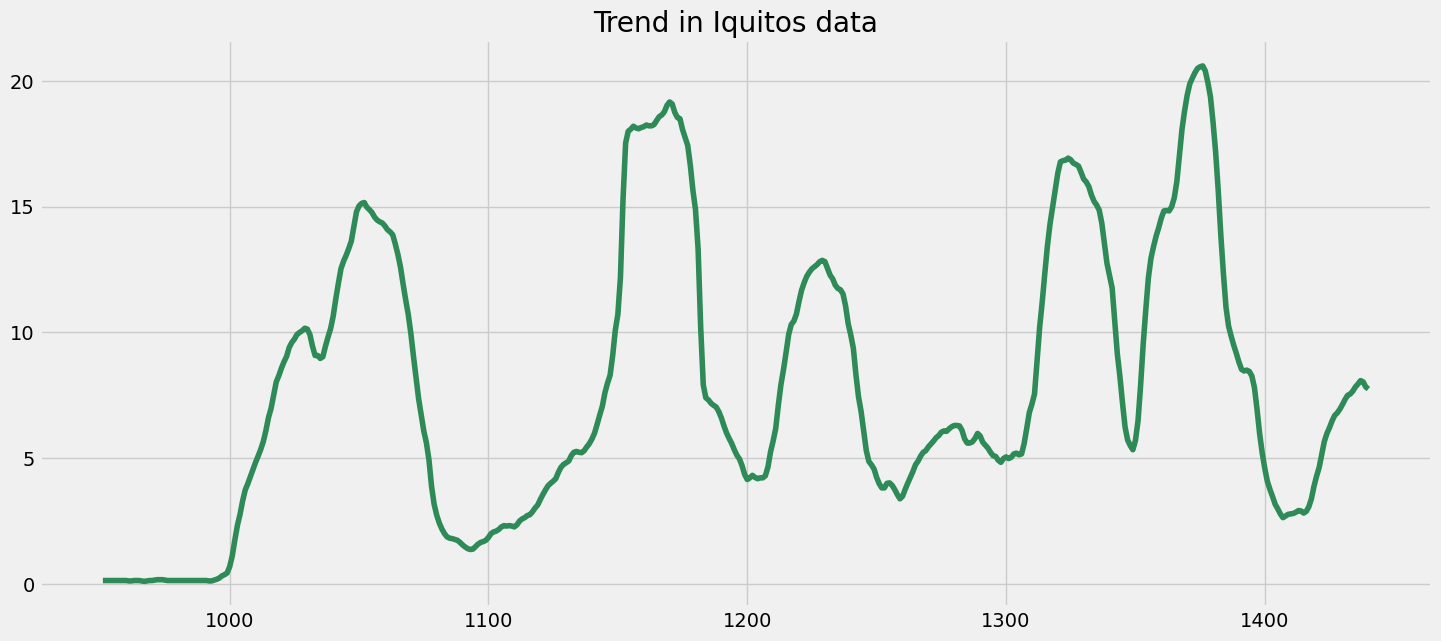

In [114]:
#Decomposing to three components


#Use an additive model
result_iq = sm.tsa.seasonal_decompose(iq['total_cases'], model='additive', period=30)

plt.figure(figsize=(16,7))
plt.plot(result_iq.trend,color='seagreen')
plt.title('Trend in Iquitos data')


Text(0.5, 1.0, 'Seasonality in Iquitos data')

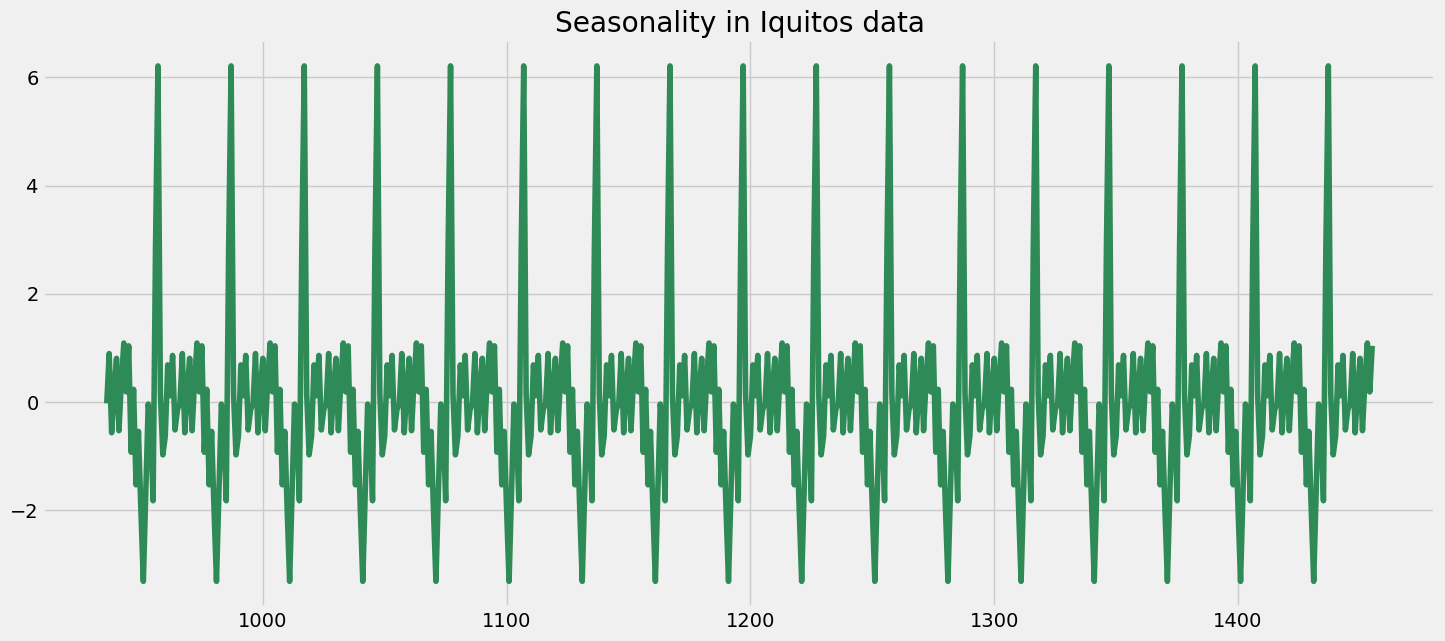

In [115]:
#Seasonality


plt.figure(figsize=(16,7))
plt.plot(result_iq.seasonal,color='seagreen')
plt.title('Seasonality in Iquitos data')

There is some seasonality in this dataset too.

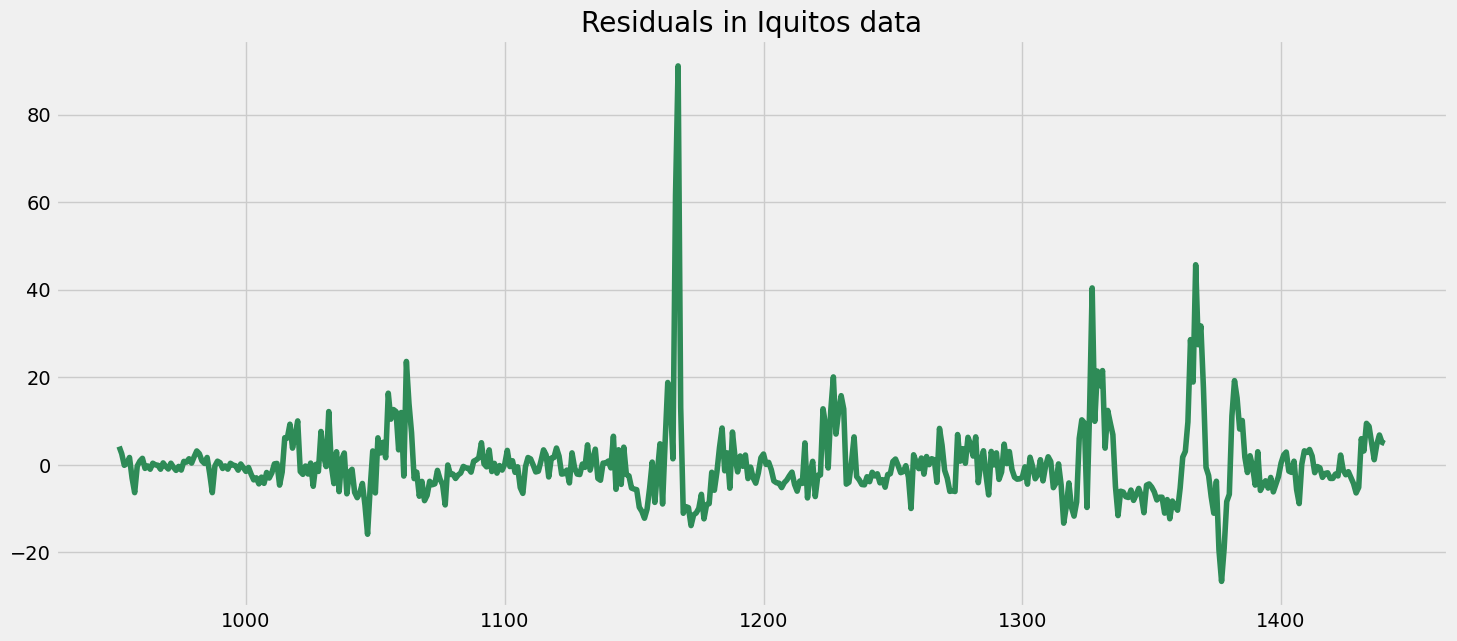

In [116]:
# Residuals
plt.figure(figsize=(16,7))
plt.plot(result_iq.resid, color='seagreen')
plt.title('Residuals in Iquitos data')
plt.show()


These are unexpected events present in the data.

**Stationarity Check**

In [117]:
adfuller_result = adfuller(dec_iq['total_cases'], autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print(f'Critical Values: {key}, {value}')


ADF Statistic: -6.931958902653718
p-value: 1.0783979646601498e-09
Critical Values: 1%, -3.4401331487581754
Critical Values: 5%, -2.865856987951189
Critical Values: 10%, -2.569068936347423


The time series' non-stationarity is the test's null hypothesis. The null hypothesis may be rejected and it can be said that the time series is stationary if the test's p-value is less than the significance threshold, which is typically 0.05.

The ADF statistic in this instance is -6.96, and the p-value is 9.12e-10, which is significantly less than 0.05. As a result, the null hypothesis may be rejected and it is determined that the time series is stationary. For reference, the critical values at the 1%, 5%, and 10% levels are also given.


**ARIMA Model Implementation**

In [118]:
#First model
newmodel = ARIMA(ts1, order=(3,2,3))
result_iq = newmodel.fit()

#Predictions
predictions_iq = result_iq.predict('01/01/2002','01/01/2013')

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

In [119]:

#actual values
actuals1 = df_iq['01/01/2002':'01/01/2013']['total_cases'][0:573]

In [120]:
#checking on accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals1[0:573], predictions_iq)
print('MAE: %f' %mae)


MAE: 3.943665


In [ ]:
#Tuning our model
import itertools

p = d = q = range(0, 6)
pdq = list(itertools.product(p, d, q))
for parameters in pdq:
  try:
    mod =ARIMA(ts1, order=(parameters))
    result_iq = mod.fit()
    print('ARIMA{} - AIC:{}' . format(parameters, results.aic))
  except:
    continue

/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 0, 0) - AIC:9435.52991462428
ARIMA(0, 0, 1) - AIC:9435.52991462428
ARIMA(0, 0, 2) - AIC:9435.52991462428
ARIMA(0, 0, 3) - AIC:9435.52991462428
ARIMA(0, 0, 4) - AIC:9435.52991462428
ARIMA(0, 0, 5) - AIC:9435.52991462428
ARIMA(0, 1, 0) - AIC:9435.52991462428
ARIMA(0, 1, 1) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 1, 2) - AIC:9435.52991462428
ARIMA(0, 1, 3) - AIC:9435.52991462428
ARIMA(0, 1, 4) - AIC:9435.52991462428
ARIMA(0, 1, 5) - AIC:9435.52991462428
ARIMA(0, 2, 0) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 2, 1) - AIC:9435.52991462428
ARIMA(0, 2, 2) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 2, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 2, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 2, 5) - AIC:9435.52991462428
ARIMA(0, 3, 0) - AIC:9435.52991462428
ARIMA(0, 3, 1) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 3, 2) - AIC:9435.52991462428
ARIMA(0, 3, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 3, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 3, 5) - AIC:9435.52991462428
ARIMA(0, 4, 0) - AIC:9435.52991462428
ARIMA(0, 4, 1) - AIC:9435.52991462428
ARIMA(0, 4, 2) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 4, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

ARIMA(0, 4, 4) - AIC:9435.52991462428
ARIMA(0, 4, 5) - AIC:9435.52991462428
ARIMA(0, 5, 0) - AIC:9435.52991462428
ARIMA(0, 5, 1) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 5, 2) - AIC:9435.52991462428
ARIMA(0, 5, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(0, 5, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so

ARIMA(0, 5, 5) - AIC:9435.52991462428
ARIMA(1, 0, 0) - AIC:9435.52991462428
ARIMA(1, 0, 1) - AIC:9435.52991462428
ARIMA(1, 0, 2) - AIC:9435.52991462428
ARIMA(1, 0, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(1, 0, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 5) - AIC:9435.52991462428
ARIMA(1, 1, 0) - AIC:9435.52991462428
ARIMA(1, 1, 1) - AIC:9435.52991462428
ARIMA(1, 1, 2) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(1, 1, 3) - AIC:9435.52991462428
ARIMA(1, 1, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(1, 1, 5) - AIC:9435.52991462428
ARIMA(1, 2, 0) - AIC:9435.52991462428
ARIMA(1, 2, 1) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(1, 2, 2) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 2, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 2, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 2, 5) - AIC:9435.52991462428
ARIMA(1, 3, 0) - AIC:9435.52991462428
ARIMA(1, 3, 1) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(1, 3, 2) - AIC:9435.52991462428
ARIMA(1, 3, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(1, 3, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 3, 5) - AIC:9435.52991462428
ARIMA(1, 4, 0) - AIC:9435.52991462428
ARIMA(1, 4, 1) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(1, 4, 2) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 4, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 4, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

ARIMA(1, 4, 5) - AIC:9435.52991462428
ARIMA(1, 5, 0) - AIC:9435.52991462428
ARIMA(1, 5, 1) - AIC:9435.52991462428
ARIMA(1, 5, 2) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 5, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

ARIMA(1, 5, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so

ARIMA(1, 5, 5) - AIC:9435.52991462428
ARIMA(2, 0, 0) - AIC:9435.52991462428
ARIMA(2, 0, 1) - AIC:9435.52991462428
ARIMA(2, 0, 2) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(2, 0, 3) - AIC:9435.52991462428
ARIMA(2, 0, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(2, 0, 5) - AIC:9435.52991462428
ARIMA(2, 1, 0) - AIC:9435.52991462428
ARIMA(2, 1, 1) - AIC:9435.52991462428
ARIMA(2, 1, 2) - AIC:9435.52991462428
ARIMA(2, 1, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(2, 1, 4) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 5) - AIC:9435.52991462428
ARIMA(2, 2, 0) - AIC:9435.52991462428
ARIMA(2, 2, 1) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

ARIMA(2, 2, 2) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

ARIMA(2, 2, 3) - AIC:9435.52991462428


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so

ARIMA(2, 2, 4) - AIC:9435.52991462428


In [ ]:

#new predictions

predictions_iq = result_iq.predict('01/01/2002','01/01/2013')

In [ ]:
#new mae
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals1[0:573], predictions_iq)
print('MAE: %f' %mae)

In [ ]:
print(result_iq.summary().tables[1])

**Validating the forecasts**

In [ ]:
series = iq_new['total_cases']

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

error = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % error)

iq_cases_pred = predictions
# plot
plt.figure(figsize=(16,7))
plt.plot(test)
plt.plot(iq_cases_pred, color='red')
plt.show()


In [ ]:
#San Juan
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(iq_new.index[:676], iq_new['total_cases'], label = 'Actual Cases', linewidth = 3, alpha = .75)
ax.plot(iq_new.index[446:676], iq_cases_pred, label = 'Predicted Cases', linewidth = 3)

ax.legend(fontsize=25)
ax.set_xlabel('Date', fontsize = 25)
ax.set_ylabel('Cases', fontsize = 25)
plt.show()


This code trains an ARIMA model on the San Juan data and predicts the total number of dengue fever cases. It then calculates the Mean Absolute Error (MAE) between the predicted and actual values. Finally, it plots the actual and predicted values for visual comparison.

In [ ]:
#Final Model and Visualizations
series = sj_new['total_cases']

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
error = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % error)

sj_cases_pred = predictions
# plot
plt.figure(figsize=(16,7))
plt.plot(test)
plt.plot(sj_cases_pred, color='red')
plt.show()


In [ ]:
#San Juan
plt.figure(figsize=(16, 6))
plt.plot(df_sj.index[:1196], sj_new['total_cases'], label = 'Actual Cases', linewidth = 3, alpha = .75)
plt.plot(df_sj.index[789:1196], sj_cases_pred, label = 'Predicted Cases', linewidth = 3)

plt.legend(fontsize=25)
plt.xlabel('Date', fontsize = 25)
plt.ylabel('Cases', fontsize = 25)

**Implementation of SARIMA.**

In [ ]:
plt.figure(figsize=(16, 7))

sns.lineplot(data=sj_new, x=sj_new.index, y='total_cases', color='c')

plt.title('San Juan Total Cases since June 1990(April) and Expected Cases from 2008 to 2013(April)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cases Recorded', fontsize=14)
plt.show()


In [ ]:
#Tuned SARIMAX model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_sarimax = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
     

In [ ]:

#predictions using SARIMAX

predictions_sarimax = results_sarimax.predict('01/01/2008','01/01/2013')
predictions_sarimax

In [ ]:

#actual values
actuals_sarimax = df_sj['01/01/2008':'01/01/2013']['total_cases'][0:261]

In [ ]:
actuals_sarimax

In [ ]:
#checking on accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals_sarimax[0:261], predictions_sarimax)
print('MAE: %f' %mae)

In [ ]:
#San Juan
plt.figure(figsize=(16, 6))
plt.plot(df_sj.index[:1196], sj_new['total_cases'], label = 'Actual Cases', linewidth = 3, alpha = .75, color='seagreen')
plt.plot(df_sj.index[920:1181], predictions_sarimax, label = 'Predicted Cases', linewidth = 3, color='orangered')

plt.legend(fontsize=25,facecolor ='seagreen')
plt.title('San Juan Total cases and Prediction Visualization.')
plt.xlabel('Date', fontsize = 25)
plt.ylabel('Cases', fontsize = 25)

Iquitos.

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(iq_new.index, iq_new['total_cases'], color='c')
plt.xlabel('Time Frame')
plt.ylabel('Total Cases Recorded')
plt.title('Iquitos Total cases since June 2000 and expected cases from 2010 to 2013.')
plt.show()


In [ ]:
#Tuned SARIMAX model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            resultsiq_sarimax = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
#predictions using SARIMAX

predictions_sarimax = resultsiq_sarimax.predict('01/01/2010','01/01/2013')
predictions_sarimax

In [ ]:
#actual values
actualsiq_sarimax = df_iq['01/01/2010':'25/06/2013']['total_cases'][0:182]

In [ ]:

#checking on accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals_sarimax[0:182], actualsiq_sarimax)
print('MAE: %f' %mae)

In [ ]:
actualsiq_sarimax = df_iq['01/01/2010':'25/06/2013']['total_cases']#[0:157]
actualsiq_sarimax

In [ ]:

#San Juan
plt.figure(figsize=(16, 6))
plt.plot(df_iq.index[:676], iq_new['total_cases'], label = 'Actual Cases', linewidth = 3, alpha = .75,color='seagreen')
plt.plot(df_iq.index[494:676], actualsiq_sarimax, label = 'Predicted Cases', linewidth = 3,color='orangered')

plt.legend(fontsize=25, facecolor ='seagreen')
plt.title('Iquitos Total Cases Visualization using SARIMA.')
plt.xlabel('Date', fontsize = 25)
plt.ylabel('Cases', fontsize = 25)

In [ ]:
#San Juan Predictions

pred_sj['total_cases']

In [ ]:
#Merging San Juan predictions with the test set.

sj_test['total_cases'] = pred_sj['total_cases']
sj_test

In [ ]:
#Concat Test set with train set.

sj.drop(['ndvi_desc','ndvi_all_directions'],1,inplace=True)

final_datasetsj = pd.concat([sj,sj_test])
final_datasetsj

In [ ]:
#Iquitos Predictions 

pred_iq['total_cases']


In [ ]:

#Reset and drop index for iq test

iq_test = iq_test.reset_index()
iq_test = iq_test.drop('index',1)
iq_test

In [ ]:
#Merging iquitos  predictions with the test set.

iq_test['total_cases'] = pred_iq['total_cases']
iq_test
     

In [ ]:
#iq data train
iq.drop(['ndvi_desc','ndvi_all_directions'],1,inplace=True)
iq
  

In [ ]:
#Iquitos trainset
#Reset and drop index

iq = iq.reset_index()
iq = iq.drop('index',1)
iq

In [ ]:

#Concat the train and test set

final_datasetiq = pd.concat([iq, iq_test])
final_datasetiq

In [ ]:

#Merging the two datasets from the two cities

final_dataset = pd.concat([final_datasetsj, final_datasetiq])
final_dataset

In [ ]:
sj_test_final = sj_test.reset_index(drop=True )
sj_test_final


In [ ]:

iq_test
iq_test_final = iq_test.reset_index(drop=True)
iq_test_final
     


In [ ]:

#Concat the train and test set

submission = pd.concat([sj_test_final, iq_test_final])
submission
     

In [ ]:

final =submission[['city','year','weekofyear','total_cases']]
final

In [ ]:
print(len(pred_sj['total_cases']))
print(len(pred_iq['total_cases']))

Our model predict for 260 and 156 time period